### Fitting the FIR SED

Beam Size: 0.67'' x 0.61''
Beam Size: 0.72'' x 0.69''
Beam Size: 0.78'' x 0.74''
Beam Size: 0.82'' x 0.73''
Aperture is 2.8'' x 1.8'' with a rotation angle of 28 degrees


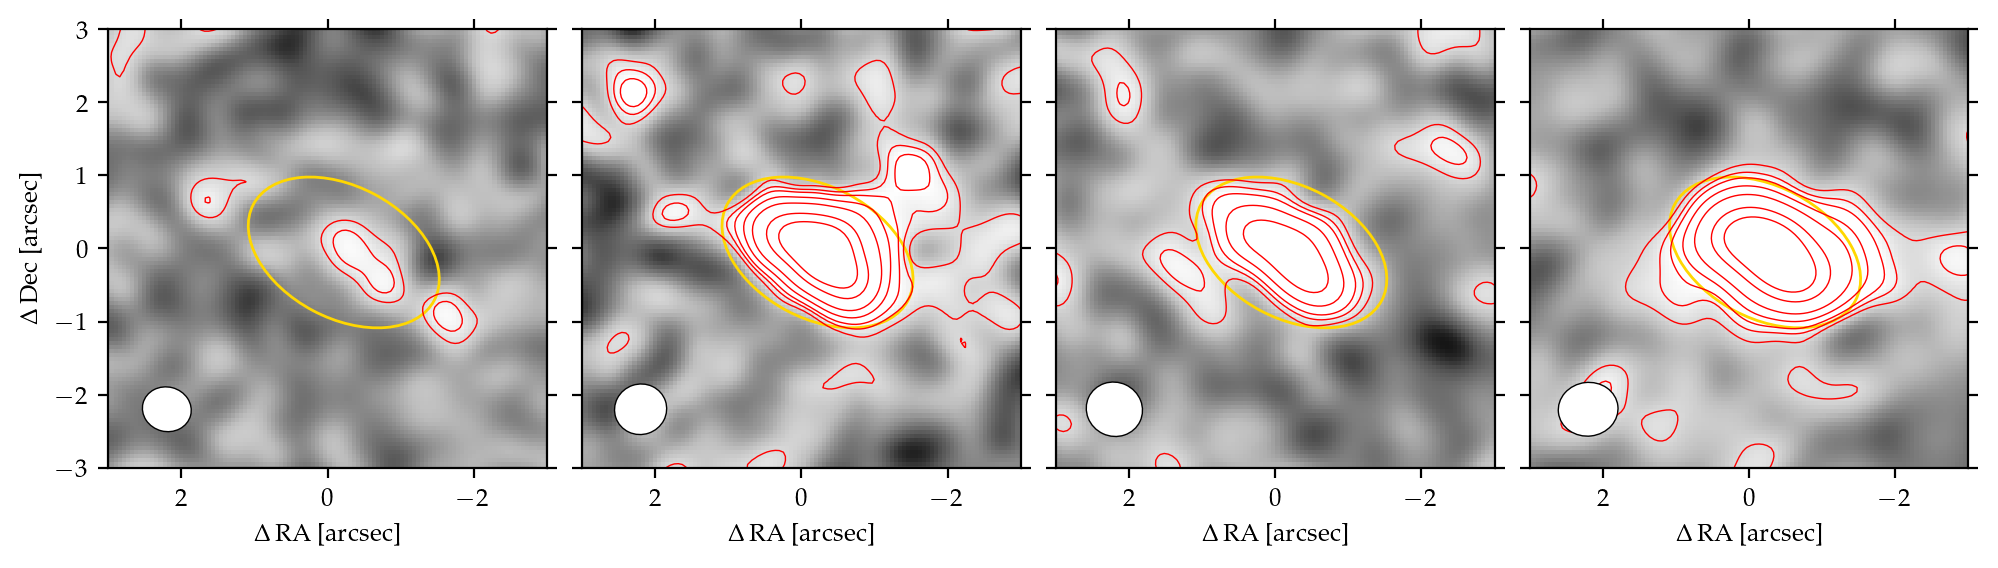

In [39]:
from base import *

fig = plt.figure(dpi=200, figsize=(12,3), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=1, ncols=4)
gs.update(wspace=0.08)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
ax = [ax0,ax1,ax2,ax3]

weighting = 'natural_uv0.5'

im = image('OIII52','continuum',weighting)
i = ax[0].imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-4*im.std, vmax=4*im.std)
ax[0].contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,4,6,9,15,20])*im.std, linewidths=0.5)
ax[0].plotBeam(im, (2.2,-2.2))
print(f"Beam Size: {im.header['BMAJ']*60*60:.2f}'' x {im.header['BMIN']*60*60:.2f}''")


im = image('OIII','continuum',weighting)
i = ax[1].imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-4*im.std, vmax=4*im.std)
ax[1].contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,4,6,9,15,20])*im.std, linewidths=0.5)
ax[1].plotBeam(im, (2.2,-2.2))
print(f"Beam Size: {im.header['BMAJ']*60*60:.2f}'' x {im.header['BMIN']*60*60:.2f}''")

im = image('NII','continuum',weighting)
i = ax[2].imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-4*im.std, vmax=4*im.std)
ax[2].contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,4,6,9,15,20])*im.std, linewidths=0.5)
ax[2].plotBeam(im, (2.2,-2.2))
print(f"Beam Size: {im.header['BMAJ']*60*60:.2f}'' x {im.header['BMIN']*60*60:.2f}''")


im = image('CII','continuum','natural_uv0.7')
i = ax[3].imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-4*im.std, vmax=4*im.std)
ax[3].contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,4,6,9,15,20])*im.std, linewidths=0.5)
ax[3].plotBeam(im, (2.2,-2.2))
print(f"Beam Size: {im.header['BMAJ']*60*60:.2f}'' x {im.header['BMIN']*60*60:.2f}''")

R = 3
ax[0].set_xlim(R, -R)
ax[0].set_ylim(-R, R)
ax[0].set_xlabel(r'$\Delta\,{\rm RA}$ [arcsec]')
ax[0].set_ylabel(r'$\Delta\,{\rm Dec}$ [arcsec]')

ax[1].set_xlim(R, -R)
ax[1].set_ylim(-R, R)
ax[1].set_xlabel(r'$\Delta\,{\rm RA}$ [arcsec]')

ax[2].set_xlim(R, -R)
ax[2].set_ylim(-R, R)
ax[2].set_xlabel(r'$\Delta\,{\rm RA}$ [arcsec]')

ax[3].set_xlim(R, -R)
ax[3].set_ylim(-R, R)
ax[3].set_xlabel(r'$\Delta\,{\rm RA}$ [arcsec]')

ax[1].tick_params(labelleft=False)
ax[2].tick_params(labelleft=False)
ax[3].tick_params(labelleft=False)


x0, y0 = 134, 126
center = ((im.x0-x0)*im.cell, (y0-im.y0)*im.cell)
width = 2.8
height = 1.8

angle = 28

el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold')
ax[0].add_patch(el)
el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold')
ax[1].add_patch(el)
el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold')
ax[2].add_patch(el)
el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold')
ax[3].add_patch(el)

print(f"Aperture is {width}'' x {height}'' with a rotation angle of {angle} degrees")


plt.show()

In [40]:
from astropy.constants import c,h,k_B
c = c.to(u.m/u.s).value
h = h.to(u.J*u.s).value
k_B = k_B.to(u.J/u.K).value

z = 7.132
T_CMB_z0 = 2.73 
T_CMB = T_CMB_z0*(1+z)


def BB(lam, logA, T, beta): 
    '''Basic blackbody spectrum given by Planck's Law.'''
    nu = c/(lam*1e-6) 
    return np.power(10., logA)* np.power(nu, 3) / (np.exp(h*nu/(k_B*T))-1)

def CMB(lam,T,beta):
    '''Correction for CMB. Ratio of f_observed / f_intrinsic from da Cunha et al. 2013'''
    return 1 - (BB(lam, 1, T_CMB, beta)/BB(lam, 1, T, beta))
    
def MBB(lam, logA, T, beta):
    nu = c/(lam*1e-6)
    return BB(lam, logA, T, beta) * np.power(nu,beta)

def Tdust_z(T, beta):
    '''Correction for CMB. From da Cunha et al. 2013 but adapted from Novak et al. 2019'''
    return (T**(beta+4) + T_CMB_z0**(beta+4) * ((1+z)**(beta+4)-1))**(1/(beta+4))
    
def MBB_CMB(lam, logA, T, beta):
    # by multiplying our MBB by the ratio f_observed / f_intrinsic, we convert it to the observed frame
    return MBB(lam, logA, Tdust_z(T,beta), beta) * CMB(lam, Tdust_z(T,beta), beta)


# def MBB_CMB(lam, logA, T, beta):
#     # by multiplying our MBB by the ratio f_observed / f_intrinsic, we convert it to the observed frame
#     return MBB(lam, logA, T, beta) * CMB(lam, T, beta)

In [41]:
im0 = image('OIII52','continuum',weighting)
im1 = image('OIII','continuum',weighting)
im2 = image('NII','continuum',weighting)
im3 = image('CII','continuum','natural_uv0.7')
pos = (im1.x0,im1.y0)

obs_nu_mins = np.array([690, 404.5, 336, 217]) * 1e9
# obs_nu_mins = np.array([690, 404.5, 217]) * 1e9
obs_lam_mins = c/obs_nu_mins
lam_mins = obs_lam_mins/(z+1) * 1e6

obs_nu_maxs = np.array([700, 420, 352, 236]) * 1e9
# obs_nu_maxs = np.array([700, 420, 236]) * 1e9
obs_lam_maxs = c/obs_nu_maxs
lam_maxs = obs_lam_maxs/(z+1) * 1e6

lam = np.mean([lam_mins,lam_maxs],axis=0) 

from photutils.aperture import EllipticalAperture, aperture_photometry

ap = EllipticalAperture((x0,y0), a=width/2/im0.cell, b=height/2/im0.cell, theta=-angle*np.pi/180)

tab0 = aperture_photometry(im0.data, ap, error=im0.error)
f0 = tab0['aperture_sum'][0]
std0 = tab0['aperture_sum_err'][0]
std0 = np.sqrt(std0**2 + (0.2*f0)**2)

tab1 = aperture_photometry(im1.data, ap, error=im1.error)
f1 = tab1['aperture_sum'][0]
std1 = tab1['aperture_sum_err'][0]
std1 = np.sqrt(std1**2 + (0.1*f1)**2)

tab2 = aperture_photometry(im2.data, ap, error=im2.error)
f2 = tab2['aperture_sum'][0]
std2 = tab2['aperture_sum_err'][0]
std2 = np.sqrt(std2**2 + (0.1*f2)**2)

tab3 = aperture_photometry(im3.data, ap, error=im3.error)
f3 = tab3['aperture_sum'][0]
std3 = tab3['aperture_sum_err'][0]
std3 = np.sqrt(std3**2 + (0.1*f3)**2)

NPix = ap.area

im = image('CO','continuum','natural_uv0')
CO_lam_min = 375.8 
CO_lam_max = 429.2 
CO_lam0 = (CO_lam_min+CO_lam_max)/2
tab = aperture_photometry(im.data, ap, error=im.error)
CO_std = tab['aperture_sum_err'][0]

f, std = np.array([f0,f1,f2,f3]),np.array([std0,std1,std2,std3])

from scipy.optimize import curve_fit,fmin_slsqp
x_lam = np.power(10,np.linspace(1,4,500))
T0 = 45 
beta0 = 1.75
A0 = -np.log10(np.max(MBB_CMB(x_lam, 0, T0, beta0))/np.max(f))

# fit data to greybody
coeff, var_matrix = curve_fit(MBB_CMB, lam, f, sigma=std, p0=[A0,T0,beta0], absolute_sigma=True)#, bounds=([-100,30,1],[-20,60,2.5]), maxfev=10000)
coeff_err = np.sqrt(np.diag(var_matrix))
print(f'T = {coeff[1]:.1f} ± {coeff_err[1]:.1f} K')
print(f'Beta = {coeff[2]:.2f} ± {coeff_err[2]:.2f}')

T = 41.2 ± 14.3 K
Beta = 1.74 ± 0.83


### Now lets do this in a Monte-Carlo fashion

In [42]:
def chisq(coeff):
    # needs to equal 1 when coeff is optimal 
    r = newf - MBB_CMB(lam, *coeff)
    return np.sum((r/std)**2)

def constraint1(coeff): 
    # all the values of the returned array will be >= 0 at the end. 
    # in other words, the fitted greybody value at CO wavelengths must be less than the maximum constraint
    # or, the maximum - fitted values must be >= 0
    return 3*CO_std - MBB_CMB(CO_lam0, *coeff)

def constraint2(coeff): 
    return MBB_CMB(CO_lam0, *coeff) 

In [43]:
ieqcons = [constraint1,constraint2]

newf = f
coeff, fx, its, imode, smode = fmin_slsqp(chisq, coeff, iprint=0, full_output=True, ieqcons=ieqcons)#, bounds=[(-100,-20),(10,80),(0.5,3)])

N = 1000
newcoeffs = np.zeros(shape=(N,3))
np.random.seed(123)
for i in tqdm.tqdm(range(N)):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        newf = np.random.normal(loc=f, scale=std)
        newcoeffs[i,:] = fmin_slsqp(chisq, coeff, 
                                    ieqcons=ieqcons,
                                    #bounds=[(-100,-20),(10,80),(0.5,3)],
                                    iprint = 0)

100%|██████████| 1000/1000 [00:33<00:00, 29.52it/s]


In [44]:
yvalues = [MBB_CMB(x_lam, newcoeffs[i,0], newcoeffs[i,1],newcoeffs[i,2]) for i in range(N)]
yvalues = np.array(yvalues)
ymeans = np.mean(yvalues,axis=0)
ystds = np.std(yvalues,axis=0)

coeff_err_upper = np.zeros(shape=np.shape(coeff))
coeff_err_lower = np.zeros(shape=np.shape(coeff))
for i in range(len(coeff)):
    cs = np.percentile(newcoeffs[:,i], [16, 50, 84])
    cs[1] = coeff[i]
    q = np.diff(cs)
    coeff_err_upper[i] = q[1]
    coeff_err_lower[i] = q[0]

In [45]:
print(f'T = {coeff[1]:.1f} + {coeff_err_upper[1]:.1f} - {coeff_err_lower[1]:.1f} K')
print(f'ß = {coeff[2]:.2f} + {coeff_err_upper[2]:.2f} - {coeff_err_lower[2]:.2f}')

T = 41.2 + 15.8 - 13.3 K
ß = 1.74 + 1.01 - 0.71


In [46]:
beta = 1.7

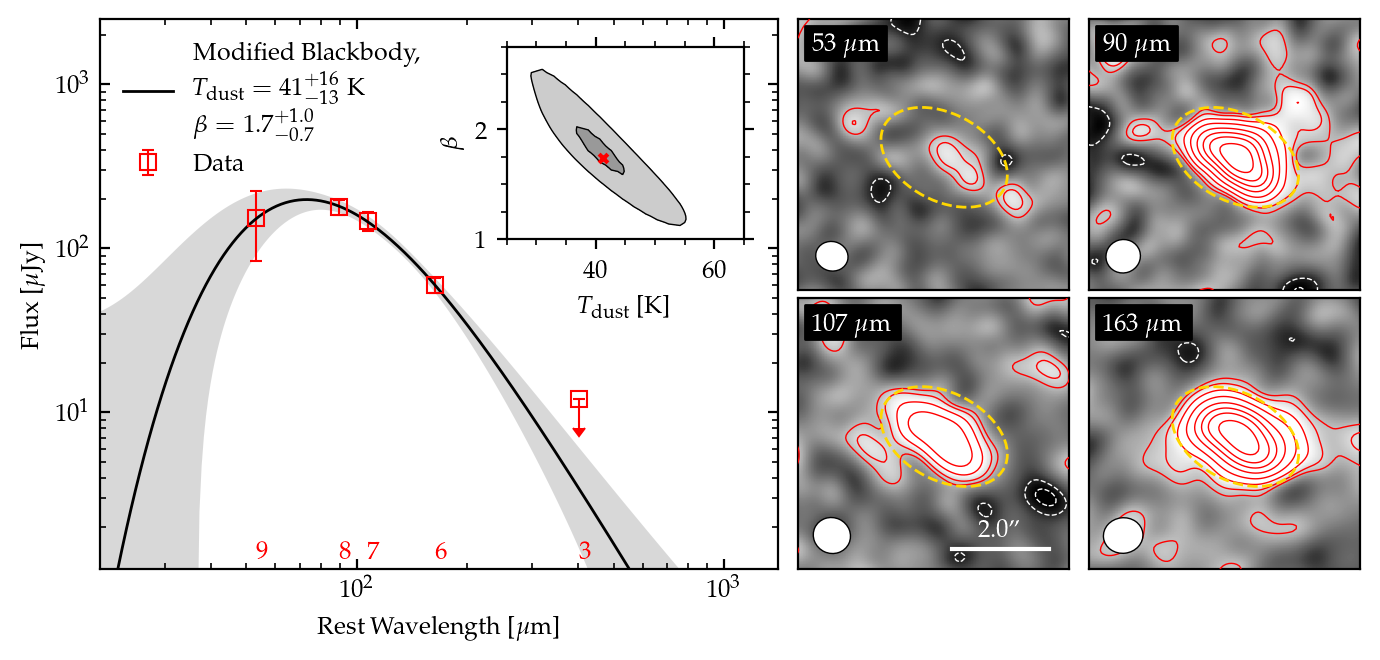

In [14]:
# plot results
fig = plt.figure(figsize=(7,3.2), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios=[2.5,1,1], height_ratios=[1,1])
gs.update(hspace=0.03, wspace=0.05, left=0.08, right=0.98, top=0.98, bottom=0.12)

ax = plt.subplot(gs[:,0])

ax.errorbar(lam,f*1e6, yerr=std*1e6, mec='r', mfc='none', mew=0.75, ecolor='r', elinewidth=0.75, capsize=2, capthick=0.75, 
             marker='s', linestyle='none', label='Data')


T_label = r"$= {0:.0f}_{{-{1:.0f}}}^{{+{2:.0f}}}$ K".format(coeff[1], coeff_err_lower[1], coeff_err_upper[1])
beta_label = r"$\beta = {0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}}$".format(coeff[2], coeff_err_lower[2], coeff_err_upper[2])

ax.plot(x_lam, MBB_CMB(x_lam, *coeff)*1e6, 
         color='k', linewidth=1, 
         label='Modified Blackbody,\n'+r'$T_{\rm dust}$ '+T_label+'\n'+beta_label)
ax.fill_between(x_lam, 1e6*(ymeans-ystds), 1e6*(ymeans+ystds), ec='none', fc='0.7', alpha=0.5, zorder=-1000)

ax.errorbar([CO_lam0], 3*CO_std*1e6, yerr=CO_std*1e6, uplims=True, 
             mec='r', mfc='none', mew=0.75, ecolor='r', elinewidth=0.75, capsize=2, capthick=0.75, 
             marker='s', linestyle='none')

ax.annotate('9', (lam[0],1.3), color='red')
ax.annotate('8', (lam[1],1.3), color='red')
ax.annotate('7', (lam[2],1.3), color='red')
ax.annotate('6', (lam[3],1.3), color='red')
ax.annotate('3', (CO_lam0,1.3), color='red')

ax.loglog()
ax.set_ylabel(r'Flux [$\mu$Jy]')
ax.set_xlabel(r'Rest Wavelength [$\mu$m]')
ax.set_xlim(20, 1400)
ax.set_ylim(1.1 ,2500)
ax.legend(loc='upper left')
ax.tick_params(direction='in', which='both')

iax = ax.inset_axes([0.6,0.6,0.35,0.35])
import seaborn as sns
sns.kdeplot(x=newcoeffs[:,1],y=newcoeffs[:,2], fill=True, ax=iax, colors=['0.8','0.6'], thresh=0.005, levels=[0.68,0.95,1], zorder=1)
sns.kdeplot(x=newcoeffs[:,1],y=newcoeffs[:,2], linewidths=0.5, ax=iax, color='k', thresh=0.005, levels=[0.68,0.95,1], zorder=2)
iax.scatter([coeff[1]],[coeff[2]],marker='x',c='r',s=10, zorder=3)
iax.set_xlabel(r'$T_{\rm dust}$ [K]')
iax.set_ylabel(r'$\beta$')
iax.set_xlim(25,65)
iax.set_ylim(1,2.75)
iax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
iax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

## change at will :)
R = 2.8

ax = plt.subplot(gs[0,2])
im = image('OIII','continuum',weighting)
i = ax.imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-3*im.std, vmax=5*im.std)
ax.contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,5,8,12,16,20,25])*im.std, linewidths=0.5, zorder=999)
ax.contour(im.data, extent=im.extent, colors='w', levels=np.array([-3,-2])*im.std, linewidths=0.5, zorder=999)
ax.plotBeam(im, (0.75*R,-0.75*R))
ax.annotate(r"90~$\mu$m", (0.05,0.95), xycoords='axes fraction', va='top', color='w', zorder=1002)
ax.tick_params(labelbottom=False, labelleft=False, left=False, right=False, top=False, bottom=False)
ax.set_xlim(R,-R)
ax.set_ylim(-R,R)

center = ((im.x0-x0)*im.cell, (y0-im.y0)*im.cell)

el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold', linestyle='--', zorder=1003)
ax.add_patch(el)

ax.fill_between([0.95*R,0.35*R],[0.7*R,0.7*R],[0.95*R,0.95*R],color='k', zorder=1001)


ax = plt.subplot(gs[0,1])
im = image('OIII52','continuum',weighting)
i = ax.imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-3*im.std, vmax=5*im.std)
ax.contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,5,8,10])*im.std, linewidths=0.5, zorder=999)
ax.contour(im.data, extent=im.extent, colors='w', levels=np.array([-3,-2])*im.std, linewidths=0.5, zorder=999)
ax.plotBeam(im, (0.75*R,-0.75*R))
ax.annotate(r"53~$\mu$m", (0.05,0.95), xycoords='axes fraction', va='top', color='w', zorder=1002)
ax.tick_params(labelbottom=False, labelleft=False, left=False, right=False, top=False, bottom=False)
ax.set_xlim(R,-R)
ax.set_ylim(-R,R)

el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold', linestyle='--', zorder=1003)
ax.add_patch(el)

ax.fill_between([0.95*R,0.35*R],[0.7*R,0.7*R],[0.95*R,0.95*R],color='k', zorder=1001)


ax = plt.subplot(gs[1,1])
im = image('NII','continuum',weighting)
i = ax.imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-3*im.std, vmax=5*im.std)
ax.contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,5,8,12,16,20,25])*im.std, linewidths=0.5, zorder=999)
ax.contour(im.data, extent=im.extent, colors='w', levels=np.array([-3,-2])*im.std, linewidths=0.5, zorder=999)
ax.plotBeam(im, (0.75*R,-0.75*R))
ax.annotate(r"107~$\mu$m", (0.05,0.95), xycoords='axes fraction', va='top', color='w', zorder=1002)
ax.tick_params(labelbottom=False, labelleft=False, left=False, right=False, top=False, bottom=False)
ax.set_xlim(R,-R)
ax.set_ylim(-R,R)

el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold', linestyle='--', zorder=1003)
ax.add_patch(el)

ax.fill_between([0.95*R,0.25*R],[0.7*R,0.7*R],[0.95*R,0.95*R],color='k', zorder=1001)

ax.plot([-0.85*R+2,-0.85*R],[-0.85*R,-0.85*R],color='w', linewidth=1.5, zorder=1000)
ax.annotate("2.0''", (np.mean([-0.85*R+2,-0.85*R]),-0.75*R), color='w', ha='center', zorder=2000)


ax = plt.subplot(gs[1,2])
im = image('CII','continuum','natural_uv0.7')
i = ax.imshow(im.data, cmap='Greys_r', origin='lower', extent=im.extent, vmin=-3*im.std, vmax=5*im.std)
ax.contour(im.data, extent=im.extent, colors='r', levels=np.array([2,3,5,8,12,16,20,25])*im.std, linewidths=0.5, zorder=999)
ax.contour(im.data, extent=im.extent, colors='w', levels=np.array([-3,-2])*im.std, linewidths=0.5, zorder=999)
ax.plotBeam(im, (0.75*R,-0.75*R))
ax.annotate(r"163~$\mu$m", (0.05,0.95), xycoords='axes fraction', va='top', color='w', zorder=1002)
ax.tick_params(labelbottom=False, labelleft=False, left=False, right=False, top=False, bottom=False)
ax.set_xlim(R,-R)
ax.set_ylim(-R,R)

el = mpl.patches.Ellipse(center, width=width, height=height, angle=angle, fc='none', ec='gold', linestyle='--', zorder=1003)
ax.add_patch(el)
ax.fill_between([0.95*R,0.25*R],[0.7*R,0.7*R],[0.95*R,0.95*R],color='k', zorder=1001)


plt.savefig('plots/FIR_SED_4.pdf')
plt.show()

### Spatially-Resolved Dust Temperature from Continuum Ratio

Fixing beta at 1.70


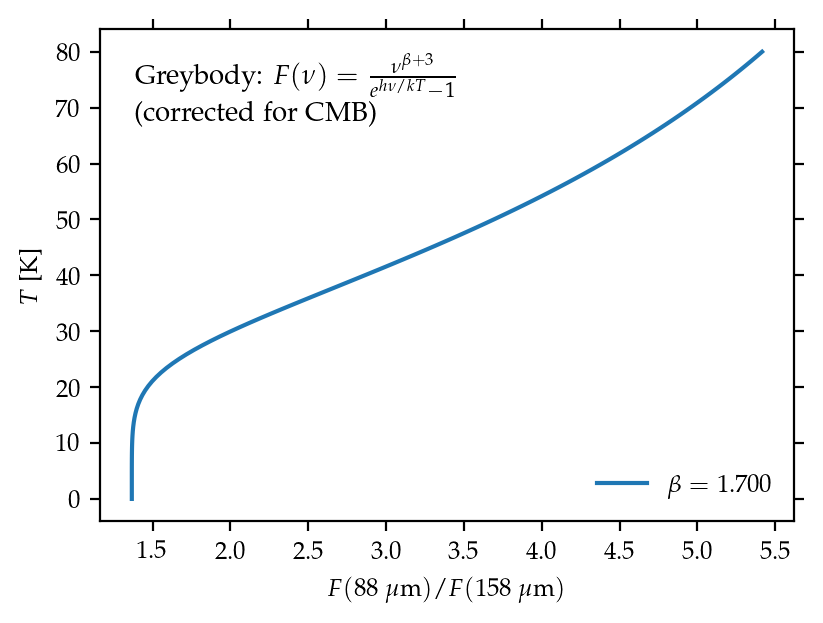

In [47]:
T = np.linspace(0,80,100)
print(f'Fixing beta at {beta:.2f}')

# modified blackbody spectrum including missed flux from CMB
# also including additional heating from the CMB

f_88 = MBB_CMB(lam[1], 1, Tdust_z(T,beta), beta) 
f_158 = MBB_CMB(lam[3], 1, Tdust_z(T,beta), beta) 
    
from scipy.interpolate import UnivariateSpline
s = UnivariateSpline(f_88/f_158, T)

plt.figure(figsize=(4,3))
plt.plot(f_88/f_158, T, label=fr'$\beta = {beta:.3f}$')

plt.legend(loc='lower right')
plt.xlabel(r'$F(88~\mu{\rm m})/F(158~\mu{\rm m})$')
plt.ylabel(r'$T$ [K]')
plt.annotate(r'Greybody: $F(\nu) = \frac{\nu^{\beta+3}}{e^{h\nu/kT}-1}$'+'\n(corrected for CMB)', (0.05,0.95), va='top', xycoords='axes fraction',size=10)
# plt.savefig('greybody_ratio.pdf')
plt.show()

Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


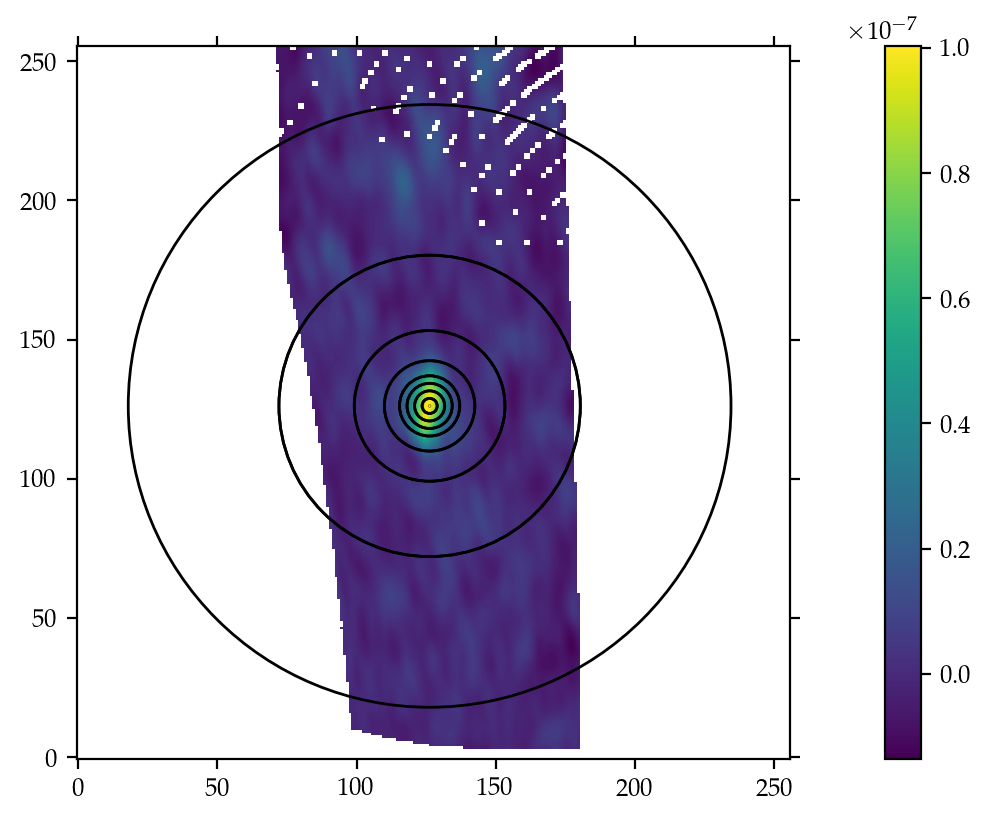

In [12]:
im1 = image('CII','continuum','natural_uv0.7')
im2 = image('OIII','continuum','natural_uv0.5')
im1.Reconstruct()
im2.Reconstruct()
im1.x0, im1.y0 = im1.x0 - 1.8, im1.y0 - 1.8
im2.x0, im2.y0 = im2.x0 - 1.8, im2.y0 - 1.8

bins = np.array([0.01, 0.5, 1, 1.5, 2, 3, 5, 10, 20])/5.28
# bins = np.arange(0.001, 3, 0.2)**1.6

bc, sb1, sb_err1 = im1.RadialProfile(normalized=False, bins=bins)
bc, sb2, sb_err2 = im2.RadialProfile(normalized=False, bins=bins)
bc = bc/im1.cell * im1.cell_kpc
bins = bins/im1.cell * im1.cell_kpc

plt.imshow(im1.data)
plt.colorbar()
for a in im1.apertures:
    a.plot()

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


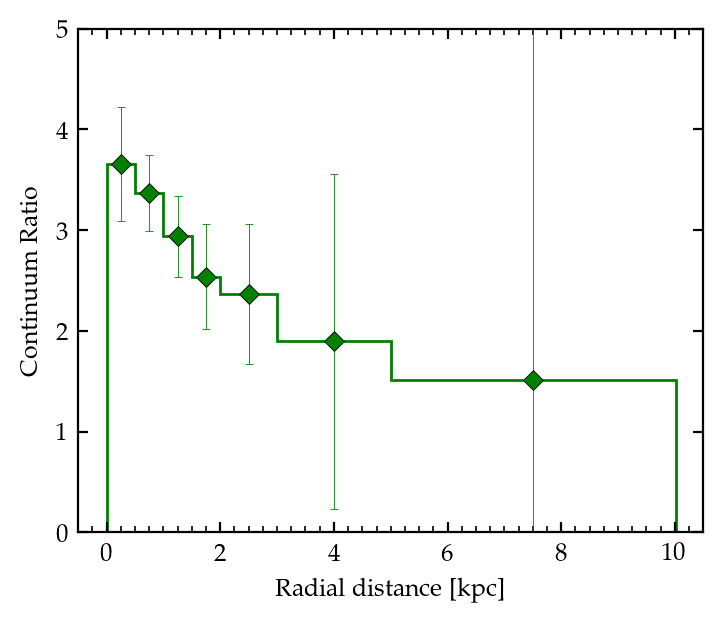

In [13]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))

ratio = sb2/sb1
ratio_err = np.abs(ratio) * np.sqrt((sb_err1/sb1)**2 + (sb_err2/sb2)**2)

ax.errorbar(bc, ratio, yerr=ratio_err, ls='none', linewidth=0.7, color='g', ecolor='g', 
            mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)

ax.stairs(ratio, bins, color='g')

ax.set_xlabel('Radial distance [kpc]')
ax.set_ylabel('Continuum Ratio')

ax.set_ylim(0, 5)
ax.set_xlim(-0.5, 10.5)

ax.tick_params(direction='in', which='both')
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

plt.show()

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 5000/5000 [00:00<00:00, 27775.78it/s]
/Users/hollis/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


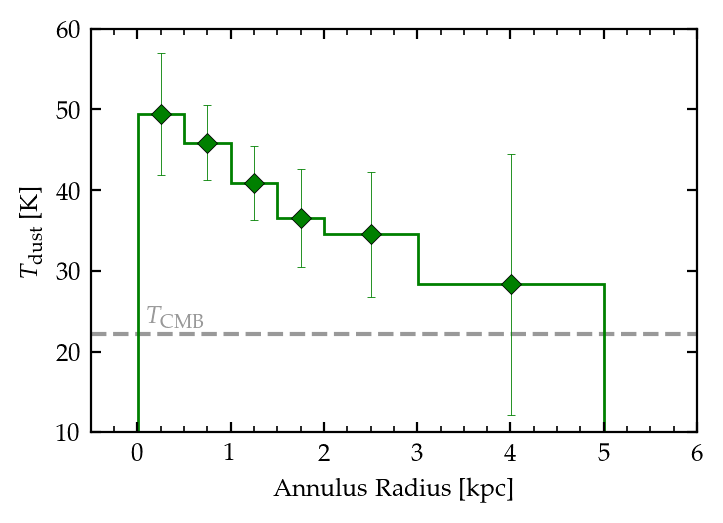

In [17]:
ratio = sb2/sb1
ratio_err = np.abs(ratio) * np.sqrt((sb_err1/sb1)**2 + (sb_err2/sb2)**2)

Tdust = s(ratio)

N = 5000
Tdust_rand = np.zeros(shape=(N, len(Tdust)))
for i in tqdm.tqdm(range(N)):
    r = np.random.normal(loc=ratio, scale=ratio_err)
    r[r < np.min(f_88/f_158)] = np.nan
    Tdust_rand[i,:] = s(r)
    
Tdust_err = np.nanstd(Tdust_rand, axis=0)

fig, ax = plt.subplots(1,1,figsize=(3.5,2.5))

ax.errorbar(bc, Tdust, yerr=Tdust_err,
            ls='none', linewidth=0.7, color='g', ecolor='g', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)

ax.stairs(Tdust[:-2], bins[:-2], color='g')

ax.axline((0,T_CMB), slope=0, color='0.6', linestyle='--', zorder=-1)
ax.annotate(r'$T_{\rm CMB}$',(0.1, 23.5), color='0.6')

ax.set_xlabel('Annulus Radius [kpc]')
ax.set_ylabel(r'$T_{\rm dust}$ [K]')
# ax.semilogy()
# ax.legend(fontsize=8)

ax.set_ylim(10, 60)
ax.set_xlim(-0.5, 6)

ax.tick_params(direction='in', which='both')
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

plt.savefig('plots/Tdust_profile.pdf')
plt.show()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
100%|██████████| 5000/5000 [00:28<00:00, 173.79it/s]
/Users/hollis/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/hollis/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


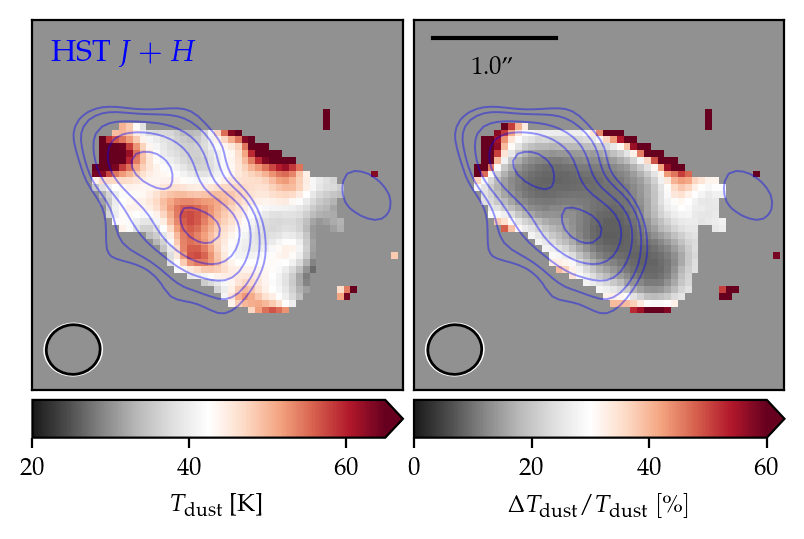

In [18]:
im1 = image('OIII','continuum','natural_uv0')
im2 = image('CII','continuum','natural_uv0.3')

wcs = WCS(im1.header, naxis=2)
from astropy.coordinates import SkyCoord

def delRADec_from_RADec(string, extent_offset=np.array([0,0,0,0])):
    sky = SkyCoord(string)
    pixel = wcs.world_to_pixel(sky)
    sky_x, sky_y = pixel[0], pixel[1]
    
    sky_x = (im1.x0 - sky_x)*im1.cell
    sky_y = (sky_y - im1.y0)*im1.cell
    
    return sky_x+extent_offset[0], sky_y+extent_offset[2]

y1 = copy(im1.data)
y2 = copy(im2.data)
y = copy(y2)

y1[y1 < 2*im1.std] = np.nan
y2[y2 < 2*im2.std] = np.nan
ratio = y1/y2
ratio_err = ratio * np.sqrt((im1.std/y1)**2 + (im2.std/y2)**2)
Tdust = s(ratio)

N = 5000
Tdust_rand = np.zeros(shape=(N, np.shape(Tdust)[0], np.shape(Tdust)[1]))
for i in tqdm.tqdm(range(N)):
    r = np.random.normal(loc=ratio, scale=ratio_err)
    r[r < np.min(f_88/f_158)] = np.nan
    Tdust_rand[i,:,:] = s(r)
    
Tdust = np.nanmedian(Tdust_rand, axis=0)
Tdust_err = np.nanstd(Tdust_rand, axis=0)

extent_offset = np.array([0.3,0.3,0,0])
extent = np.array(im1.extent) + extent_offset

R = 1.5
Tdust_assume = 30

vmax = 65
vmin = 20

cmap = copy(mpl.cm.get_cmap('RdGy_r'))
cmap.set_bad(cmap((Tdust_assume-vmin)/(vmax-vmin)))

fig = plt.figure(figsize=(4,2.6), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2, height_ratios = [2,0.2])
gs.update(top=0.99, left=0.03, right=0.97, bottom=0.18, wspace=0.03, hspace=0.03)

ax = [plt.subplot(gs[0,0]), plt.subplot(gs[0,1])]
cax = [plt.subplot(gs[1,0]), plt.subplot(gs[1,1])]


i = ax[0].imshow(Tdust, cmap=cmap, vmin=vmin, vmax=vmax, extent=extent)
cbar = fig.colorbar(i, cax=cax[0], extend='max', orientation='horizontal', label=r'$T_{\rm dust}$ [K]', ticklocation='bottom', aspect=30)

i = ax[1].imshow(Tdust_err/Tdust*100, cmap=cmap, vmin=0, vmax=60, extent=extent)
cbar = fig.colorbar(i, cax=cax[1], extend='max', orientation='horizontal', label=r'$\Delta T_{\rm dust}/T_{\rm dust}~[\%]$', ticklocation='bottom', aspect=30)

ax[0].plotBeam(im1, (0.78*R,-0.78*R), ec='w', fc='none', linewidth=1)
ax[0].plotBeam(im2, (0.78*R,-0.78*R), ec='k', fc='none', linewidth=1)

ax[1].plotBeam(im1, (0.78*R,-0.78*R), ec='w', fc='none', linewidth=1)
ax[1].plotBeam(im2, (0.78*R,-0.78*R), ec='k', fc='none', linewidth=1)

for a in ax:
    a.set_xlim(R,-R)
    a.set_ylim(-R,R)
    a.tick_params(left=False,bottom=False,top=False,right=False,labelleft=False,labelbottom=False)

# ax[0].annotate('No UVtaper', (0.05, 0.95), va='top', xycoords='axes fraction', fontsize=10)
# ax[1].annotate("UVtaper = 0.5''", (0.05, 0.95), va='top', xycoords='axes fraction', fontsize=10)

# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.917s -1d19m18.7s", extent_offset=extent_offset)), marker='*', facecolor='violet', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.962s -1d19m18.62s", extent_offset=extent_offset)), marker='*', facecolor='b', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.925s -1d19m18.96s", extent_offset=extent_offset)), marker='*', facecolor='g', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.9s -1d19m19.4s", extent_offset=extent_offset)), marker='*', facecolor='yellow', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.938s -1d19m18.5s", extent_offset=extent_offset)), marker='*', facecolor='r', edgecolor='k', linewidths=0.5, s=50, zorder=1000)

im1 = HSTimage('F125W')
im2 = HSTimage('F160W')
data = im1.data + im2.data
std = np.sqrt(im1.std**2 + im2.std**2)
ax[0].contour(data, extent=extent, levels=np.array([2,3,5,8,13])*std, colors='b', linewidths=0.7, alpha=0.4)
ax[1].contour(data, extent=extent, levels=np.array([2,3,5,8,13])*std, colors='b', linewidths=0.7, alpha=0.4)
ax[0].annotate('HST $J+H$', (0.05,0.95), xycoords='axes fraction', va='top', color='b', fontsize=11)



ax[1].plot([0.9*R,0.9*R-1],[0.9*R,0.9*R],color='k', linewidth=1.5, zorder=1000)
ax[1].annotate("1.0''", (np.mean([0.9*R-1,0.9*R]),0.8*R), color='k', ha='center', va='top')


plt.savefig('plots/Tdust.pdf')
plt.show()

# Computing SFRs from IR and UV data

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
100%|██████████| 5000/5000 [00:35<00:00, 142.83it/s]
/Users/hollis/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/hollis/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


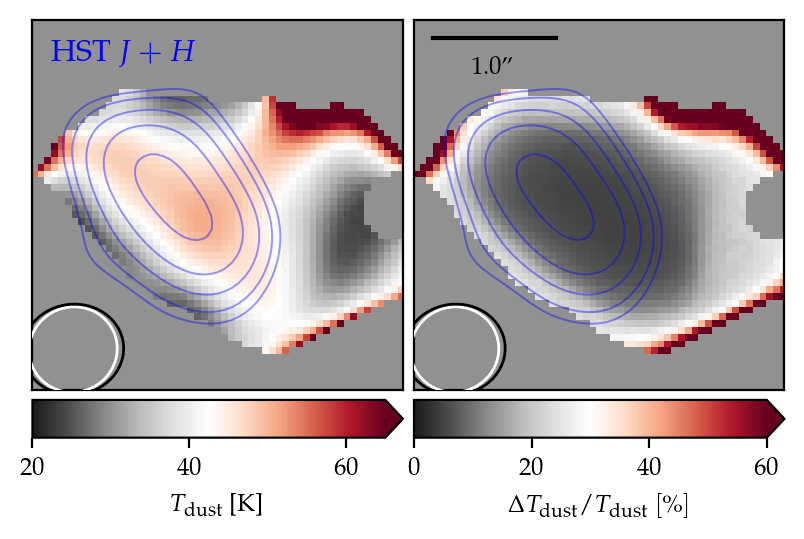

In [48]:
im1 = image('OIII','continuum','natural_uv0.5')
im2 = image('CII','continuum','natural_uv0.7')

wcs = WCS(im1.header, naxis=2)
from astropy.coordinates import SkyCoord

def delRADec_from_RADec(string, extent_offset=np.array([0,0,0,0])):
    sky = SkyCoord(string)
    pixel = wcs.world_to_pixel(sky)
    sky_x, sky_y = pixel[0], pixel[1]
    
    sky_x = (im1.x0 - sky_x)*im1.cell
    sky_y = (sky_y - im1.y0)*im1.cell
    
    return sky_x+extent_offset[0], sky_y+extent_offset[2]

y1 = copy(im1.data)
y2 = copy(im2.data)
y = copy(y2)

y1[y1 < 2*im1.std] = np.nan
y2[y2 < 2*im2.std] = np.nan
ratio = y1/y2
ratio_err = ratio * np.sqrt((im1.std/y1)**2 + (im2.std/y2)**2)
Tdust = s(ratio)

N = 5000
Tdust_rand = np.zeros(shape=(N, np.shape(Tdust)[0], np.shape(Tdust)[1]))
for i in tqdm.tqdm(range(N)):
    r = np.random.normal(loc=ratio, scale=ratio_err)
    r[r < np.min(f_88/f_158)] = np.nan
    Tdust_rand[i,:,:] = s(r)
    
Tdust = np.nanmedian(Tdust_rand, axis=0)
Tdust_err = np.nanstd(Tdust_rand, axis=0)

extent_offset = np.array([0.3,0.3,0,0])
extent = np.array(im1.extent) + extent_offset

R = 1.5
Tdust_assume = 30

vmax = 65
vmin = 20

cmap = copy(mpl.cm.get_cmap('RdGy_r'))
cmap.set_bad(cmap((Tdust_assume-vmin)/(vmax-vmin)))

fig = plt.figure(figsize=(4,2.6), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2, height_ratios = [2,0.2])
gs.update(top=0.99, left=0.03, right=0.97, bottom=0.18, wspace=0.03, hspace=0.03)

ax = [plt.subplot(gs[0,0]), plt.subplot(gs[0,1])]
cax = [plt.subplot(gs[1,0]), plt.subplot(gs[1,1])]


i = ax[0].imshow(Tdust, cmap=cmap, vmin=vmin, vmax=vmax, extent=extent)
cbar = fig.colorbar(i, cax=cax[0], extend='max', orientation='horizontal', label=r'$T_{\rm dust}$ [K]', ticklocation='bottom', aspect=30)

i = ax[1].imshow(Tdust_err/Tdust*100, cmap=cmap, vmin=0, vmax=60, extent=extent)
cbar = fig.colorbar(i, cax=cax[1], extend='max', orientation='horizontal', label=r'$\Delta T_{\rm dust}/T_{\rm dust}~[\%]$', ticklocation='bottom', aspect=30)

ax[0].plotBeam(im1, (0.78*R,-0.78*R), ec='w', fc='none', linewidth=1)
ax[0].plotBeam(im2, (0.78*R,-0.78*R), ec='k', fc='none', linewidth=1)

ax[1].plotBeam(im1, (0.78*R,-0.78*R), ec='w', fc='none', linewidth=1)
ax[1].plotBeam(im2, (0.78*R,-0.78*R), ec='k', fc='none', linewidth=1)

for a in ax:
    a.set_xlim(R,-R)
    a.set_ylim(-R,R)
    a.tick_params(left=False,bottom=False,top=False,right=False,labelleft=False,labelbottom=False)

# ax[0].annotate('No UVtaper', (0.05, 0.95), va='top', xycoords='axes fraction', fontsize=10)
# ax[1].annotate("UVtaper = 0.5''", (0.05, 0.95), va='top', xycoords='axes fraction', fontsize=10)

# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.917s -1d19m18.7s", extent_offset=extent_offset)), marker='*', facecolor='violet', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.962s -1d19m18.62s", extent_offset=extent_offset)), marker='*', facecolor='b', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.925s -1d19m18.96s", extent_offset=extent_offset)), marker='*', facecolor='g', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.9s -1d19m19.4s", extent_offset=extent_offset)), marker='*', facecolor='yellow', edgecolor='k', linewidths=0.5, s=50, zorder=1000)
# ax[0].scatter(*zip(delRADec_from_RADec("13h11m29.938s -1d19m18.5s", extent_offset=extent_offset)), marker='*', facecolor='r', edgecolor='k', linewidths=0.5, s=50, zorder=1000)

im1 = HSTimage('F125W', psfmatch=('OIII','continuum','natural_uv0.5'))
im2 = HSTimage('F160W', psfmatch=('OIII','continuum','natural_uv0.5'))
data = im1.data + im2.data
std = np.sqrt(im1.std**2 + im2.std**2)
ax[0].contour(data, extent=extent, levels=np.array([2,3,5,8,13])*std, colors='b', linewidths=0.7, alpha=0.4)
ax[1].contour(data, extent=extent, levels=np.array([2,3,5,8,13])*std, colors='b', linewidths=0.7, alpha=0.4)
ax[0].annotate('HST $J+H$', (0.05,0.95), xycoords='axes fraction', va='top', color='b', fontsize=11)



ax[1].plot([0.9*R,0.9*R-1],[0.9*R,0.9*R],color='k', linewidth=1.5, zorder=1000)
ax[1].annotate("1.0''", (np.mean([0.9*R-1,0.9*R]),0.8*R), color='k', ha='center', va='top')


# plt.savefig('plots/Tdust.pdf')
plt.show()

# Computing SFRs from IR and UV data

### Computing LIR

In [49]:
x_lam = np.linspace(8,1000,10001)/1e6
x_nu = c/x_lam
d_nu = x_nu[:-1]-x_nu[1:]

x_lam = np.linspace(8,1000,10000)/1e6
x_nu = c/x_lam


im = image('CII','continuum','natural_uv0.7')
y = im.data
y_err = im.error


F_IR = np.zeros(shape=np.shape(y))
F_IR_err = np.zeros(shape=np.shape(y))
for i in tqdm.tqdm(range(im.size)):
    for j in range(im.size):
        T = Tdust[i,j]
        T_err = Tdust_err[i,j]
        
        if np.isnan(T) or (T_err/T > 0.3):
            T = Tdust_assume

        f = y[i,j]/CMB(lam[3], Tdust_z(T,beta), beta)
        f_err = y_err[i,j]/CMB(lam[3],Tdust_z(T,beta),beta)
        
        sed = np.power(x_nu,beta+3)/(np.exp(h*x_nu/(k_B*T))-1)
        d = sed[np.argmin(np.abs(x_lam*1e6-lam[3]))] 
        
        sed /= d
        sed *= 1e-23 # now in units of erg/s cm**-2 Hz**-1
        fir = np.sum(sed*d_nu)
        
        F_IR[i,j] = f * fir # IR flux, in erg/s cm**-2
        F_IR_err[i,j] = f_err * fir
        
L_IR = F_IR / (1+z) * 4*np.pi*(Planck15.luminosity_distance(z).to(u.cm).value)**2
L_IR_err = F_IR_err / (1+z) * 4*np.pi*(Planck15.luminosity_distance(z).to(u.cm).value)**2

100%|██████████| 256/256 [00:24<00:00, 10.58it/s]


In [50]:
dx, dy, mu = open_lens_model()
L_IR_uncor = L_IR * mu
L_IR_uncor_err = L_IR_err * mu

In [51]:
SFR_IR = L_IR*3.88e-44 # Murphy et al. 2011
SFR_IR_err = L_IR_err*3.88e-44 
SFR_IR_uncor = L_IR_uncor*3.88e-44 
SFR_IR_uncor_err = L_IR_uncor_err*3.88e-44 

In [52]:
L_IR /= 3.826e33
L_IR_err /= 3.826e33
L_IR_uncor /= 3.826e33 # now putting L_IR in units of Lsun
L_IR_uncor_err /= 3.826e33

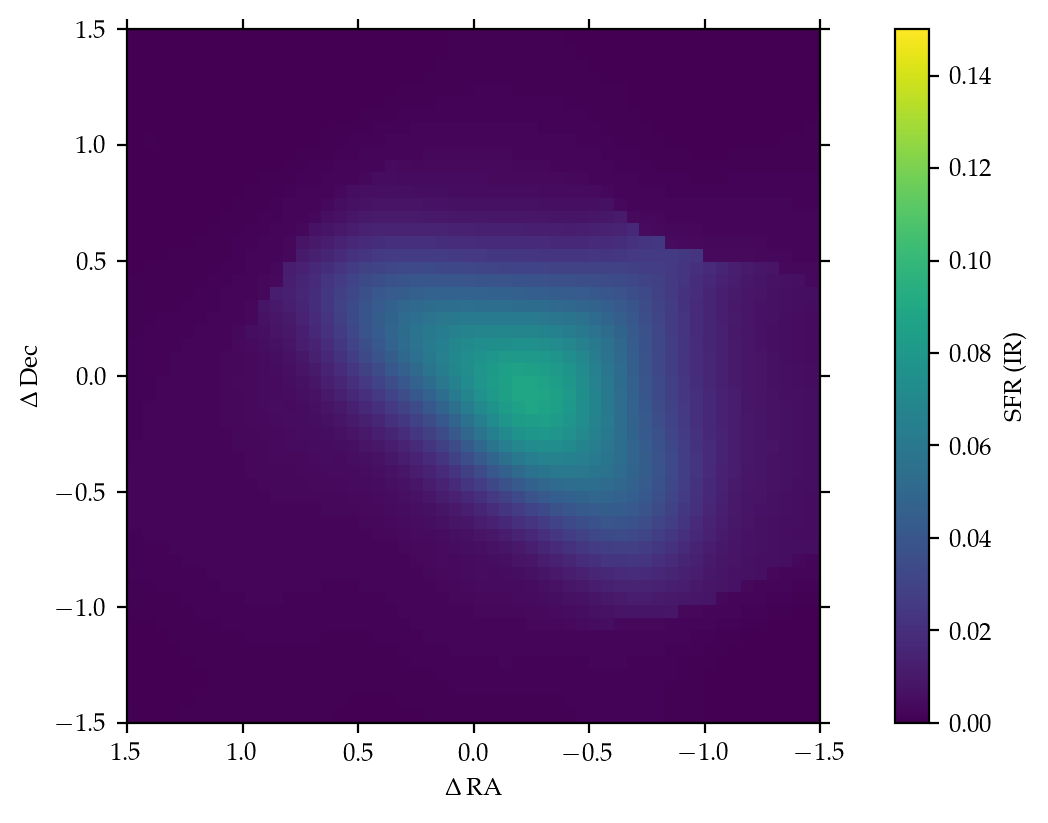

In [53]:
plt.figure()
plt.imshow(SFR_IR, cmap='viridis', norm=mpl.colors.Normalize(vmin=0, vmax=0.15), extent=im1.extent)
plt.colorbar(label='SFR (IR)')
plt.xlim(1.5,-1.5)
plt.ylim(-1.5,1.5)
plt.xlabel(r'$\Delta\,$RA')
plt.ylabel(r'$\Delta\,$Dec')
plt.show()

In [54]:
hstim1 = HSTimage('F160W', psfmatch=('OIII','continuum','natural_uv0.5'))
hstim2 = HSTimage('F125W', psfmatch=('OIII','continuum','natural_uv0.5'))
SFR_UV = hstim1.sfr + hstim2.sfr 
SFR_UV_err = np.sqrt(hstim1.sfr_err**2 + hstim2.sfr_err**2)
SFR_UV_uncor = SFR_UV * mu
SFR_UV_uncor_err = SFR_UV_err * mu

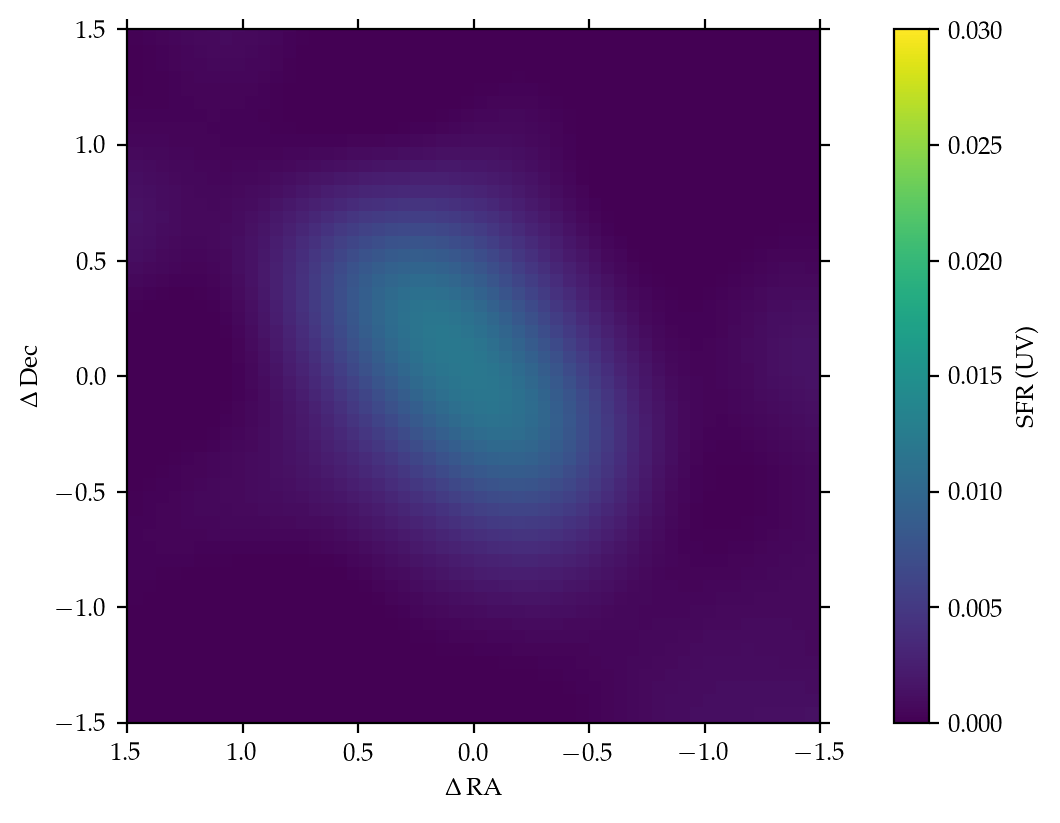

In [55]:
plt.figure()
plt.imshow(SFR_UV, cmap='viridis', norm=mpl.colors.Normalize(vmin=0, vmax=0.03), extent=im1.extent)
plt.colorbar(label='SFR (UV)')
plt.xlim(1.5,-1.5)
plt.ylim(-1.5,1.5)
plt.xlabel(r'$\Delta\,$RA')
plt.ylabel(r'$\Delta\,$Dec')
plt.show()

In [56]:
x0, y0 = 134, 126
center = ((im1.x0-x0)*im.cell, (y0-im1.y0)*im.cell)
width = 2.8
height = 1.8
angle = 25
ap = EllipticalAperture((x0,y0), a=width/2/im1.cell, b=height/2/im1.cell, theta=-25*np.pi/180) # same as used for SED fitting

tab0 = aperture_photometry(SFR_IR, ap, error=SFR_IR_err)
f0 = tab0['aperture_sum'][0]
std0 = tab0['aperture_sum_err'][0]
print(f'SFR_IR = {f0:.2f} ± {std0:.2f}')
f0_1 = f0

tab0 = aperture_photometry(SFR_UV, ap, error=SFR_UV_err)
f0 = tab0['aperture_sum'][0]
std0 = tab0['aperture_sum_err'][0]
print(f'SFR_UV = {f0:.2f} ± {std0:.2f}')

SFR_tot = SFR_UV + SFR_IR
SFR_tot_err = np.sqrt(SFR_UV_err**2 + SFR_IR_err**2)
tab0 = aperture_photometry(SFR_tot, ap, error=SFR_tot_err)
f0 = tab0['aperture_sum'][0]
std0 = tab0['aperture_sum_err'][0]
print(f'SFR_tot = {f0:.2f} ± {std0:.2f}')
f0_2 = f0

print(f'Obscured Fraction {f0_1/f0_2*100:.1f}%')

SFR_IR = 32.16 ± 0.94
SFR_UV = 4.95 ± 0.03
SFR_tot = 37.11 ± 0.95
Obscured Fraction 86.7%


Remember to change D to be roughly the beam size...


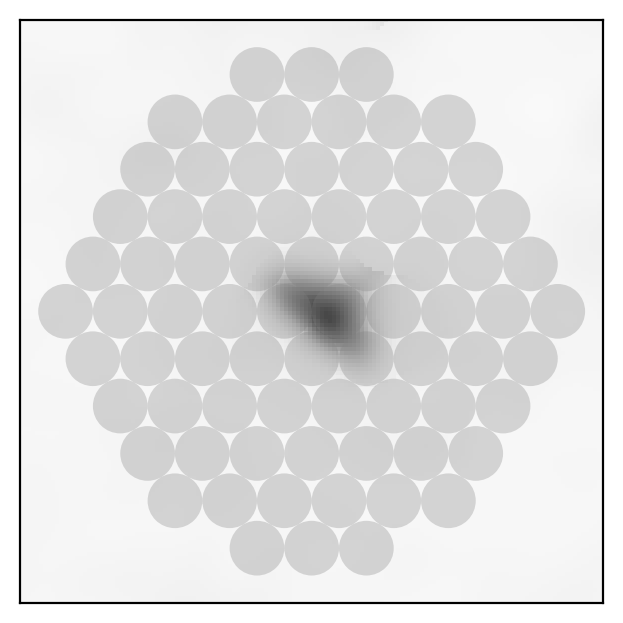

In [37]:
import circlify
im = image('CII','linemfs','natural_uv0.7')

plt.figure(figsize=(3,3))
plt.imshow(SFR_tot, extent=im.extent, cmap='Greys', vmin=-0.01, vmax=0.12)
# plt.contour(im.data, extent=im.extent, levels=np.array([2,3,5,8,13,21,34,55])*im.std, colors='r', linewidths=0.5)

print('Remember to change D to be roughly the beam size...')
x0, y0, D = 0, 0, 0.75
circles = circlify.circlify([1]*76)
coords = np.zeros((len(circles),2))
ds = np.array([])
for i,circle in enumerate(circles):
    x, y, r = circle
    x = round(x/r*D/2 + x0,3)
    y = round(y/r*D/2 + y0,3)
    r = D/2
    d = np.sqrt(x**2+y**2)
    ds = np.append(ds,d)
    coords[i] = x,y
            
coords = coords[(coords[:,0] < 1.75)|(coords[:,1] > -3.5)]


for coord in coords:
    x, y = coord
    plt.gca().add_patch(mpl.patches.Circle((x,y),radius=r, fc='0.5', ec='none', alpha=0.3))


# coords[:,0] -= coords[np.argmin(ds),0]
# coords[:,1] -= coords[np.argmin(ds),1]

plt.xlim(4,-4)
plt.ylim(-4,4)
plt.tick_params(labelleft=False,labelbottom=False,top=False,right=False,bottom=False,left=False)

plt.savefig('apertures_2.pdf')
plt.show()

In [26]:
im = image('CII','linemfs', 'natural_uv0.7') 

SCII_delta_v = im.data
nu_rest = 1900.53690000
z = 7.132
DL = Planck15.luminosity_distance(z).to(u.Mpc)
LCII_tot = 1.04e-3 * SCII_delta_v * nu_rest * (1+z)**(-1) * (DL.value)**2
LCII_std = im.error * 1.04e-3 * nu_rest * (1+z)**(-1) * (DL.value)**2
LCII_tot_uncor = LCII_tot * mu
LCII_std_uncor = LCII_std * mu
LCII_NPixPerBeam = im.NPixPerBeam

In [27]:
im = image('OIII','linemfs', 'natural_uv0.5') 

SOIII_delta_v = im.data 
nu_rest = 3393.00624400
LOIII_tot = 1.04e-3 * SOIII_delta_v * nu_rest * (1+z)**(-1) * (DL.value)**2
LOIII_std = im.error * 1.04e-3 * nu_rest * (1+z)**(-1) * (DL.value)**2
LOIII_tot_uncor = LOIII_tot * mu
LOIII_std_uncor = LOIII_std * mu
LOIII_NPixPerBeam = im.NPixPerBeam

In [28]:
x0 = coords[:,0]
y0 = coords[:,1]
R = D/2#coords[:,2]

extent = im.extent
x0 = -x0/im.cell + im.x0
y0 = y0/im.cell + im.y0
R = R/im.cell

# aperture = [CircularAperture([(x01,y01)], r) for x01,y01,r in zip(x0,y0,R)]
aperture = [CircularAperture([(x01,y01)], R) for x01,y01 in zip(x0,y0)]
LCII_ap = np.array([aperture_photometry(LCII_tot, a, error=LCII_std)['aperture_sum'][0] for a in aperture])
LCII_ap_err = np.array([aperture_photometry(LCII_tot, a, error=LCII_std)['aperture_sum_err'][0] for a in aperture])
LOIII_ap = np.array([aperture_photometry(LOIII_tot, a, error=LOIII_std)['aperture_sum'][0] for a in aperture])
LOIII_ap_err = np.array([aperture_photometry(LOIII_tot, a, error=LOIII_std)['aperture_sum_err'][0] for a in aperture])
SFR_IR_ap = np.array([aperture_photometry(SFR_IR, a, error=SFR_IR_err)['aperture_sum'][0] for a in aperture])
SFR_IR_ap_err = np.array([aperture_photometry(SFR_IR, a, error=SFR_IR_err)['aperture_sum_err'][0] for a in aperture])
SFR_UV_ap = np.array([aperture_photometry(SFR_UV, a, error=SFR_UV_err)['aperture_sum'][0] for a in aperture])
SFR_UV_ap_err = np.array([aperture_photometry(SFR_UV, a, error=SFR_UV_err)['aperture_sum_err'][0] for a in aperture])

SFR_ap = SFR_UV_ap + SFR_IR_ap
SFR_ap_err = np.sqrt(SFR_IR_ap_err**2 + SFR_UV_ap_err**2)

In [29]:
dists = ds

In [30]:
ap = LCII_tot > 3*LCII_std/LCII_NPixPerBeam
LOIII_int = np.nansum(LOIII_tot[ap])
LOIII_int_err = np.mean(LOIII_std) * np.sqrt(len(LOIII_tot[ap]))
LCII_int = np.nansum(LCII_tot[ap])
LCII_int_err = np.mean(LCII_std) * np.sqrt(len(LCII_tot[ap]))
SFR_int = np.nansum(SFR_tot[ap])
SFR_int_err = np.sqrt(np.sum(SFR_tot_err[ap]**2))

In [31]:
area = np.array([a.area for a in aperture]) * (0.055**2) * (5.28**2)

In [32]:
# LCII_ap /= area
# LCII_ap_err /= area
# LOIII_ap /= area
# LOIII_ap_err /= area
# SFR_ap /= area
# SFR_ap_err /= area

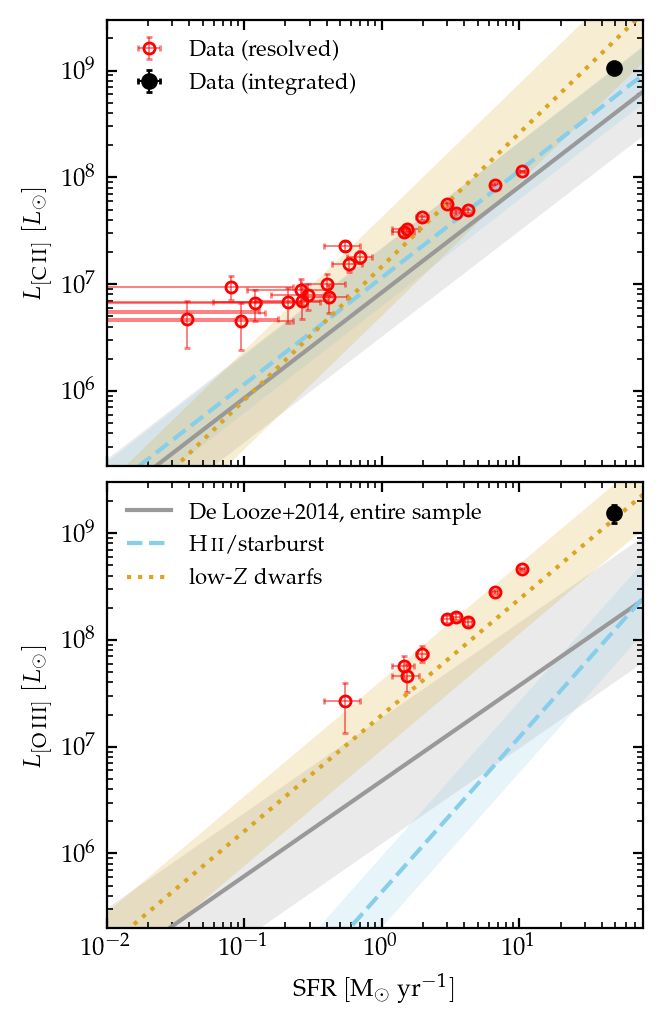

In [36]:
fig, ax = plt.subplots(2,1,figsize=(3.2,5), sharex=True)

cond1 = LCII_ap > 2*LCII_ap_err
markers, caps, bars = ax[0].errorbar(SFR_ap[cond1], LCII_ap[cond1], xerr=SFR_ap_err[cond1], yerr=LCII_ap_err[cond1], marker='o', elinewidth=0.7, capthick=0.7, 
                                     capsize=1, lw=0, ms=4, mew=1, mfc='none', mec='r', ecolor='r', label=r'Data (resolved)')

[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

ax[0].errorbar([SFR_int], [LCII_int], xerr=SFR_int_err, yerr=LCII_int_err, marker='o', elinewidth=0.7, capthick=0.7, capsize=1, lw=0, 
               ms=5, mew=1, mfc='k', mec='k', ecolor='k', label='Data (integrated)')

cond2 = LOIII_ap > 2*LOIII_ap_err
markers, caps, bars = ax[1].errorbar(SFR_ap[cond2], LOIII_ap[cond2], xerr=SFR_ap_err[cond2], yerr=LOIII_ap_err[cond2], marker='o', elinewidth=0.7, capthick=0.7, 
                                     capsize=1, lw=0, ms=4, mew=1, mfc='none', mec='r', ecolor='r')

[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

ax[1].errorbar([SFR_int], [LOIII_int], xerr=SFR_int_err, yerr=LOIII_int_err, marker='o', elinewidth=0.7, capthick=0.7, capsize=1, lw=0, 
               ms=5, mew=1, mfc='k', mec='k', ecolor='k')


# inverted from De Looze et al. Table 3
## entire sample
yint, slope, disp = -6.99, 1.01, 0.42
yint = -yint/slope
slope = 1/slope
x = np.array([-3,3])
ax[0].plot(np.power(10.,x),np.power(10.,slope*x+yint), color='0.6')
ax[0].fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='0.6', alpha=0.2, zorder=-1000)

yint, slope, disp = -7.48, 1.12, 0.66
yint = -yint/slope
slope = 1/slope
ax[1].plot(np.power(10.,x),np.power(10.,slope*x+yint), color='0.6', label='De Looze+2014, entire sample')
ax[1].fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='0.6', alpha=0.2, zorder=-1000)

## HII/starburst galaxies
yint, slope, disp = -7.06, 1, 0.27
yint = -yint/slope
slope = 1/slope
ax[0].plot(np.power(10.,x),np.power(10.,slope*x+yint), color='skyblue', linestyle='--')
ax[0].fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)

yint, slope, disp = -3.89, 0.69, 0.23
yint = -yint/slope
slope = 1/slope
ax[1].plot(np.power(10.,x),np.power(10.,slope*x+yint), color='skyblue', label=r'${\rm H}\,\textsc{ii}$/starburst', linestyle='--')
ax[1].fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)

## low-Z dwarfs
yint, slope, disp = -5.73, 0.8, 0.37
yint = -yint/slope
slope = 1/slope
ax[0].plot(np.power(10.,x),np.power(10.,slope*x+yint), color='goldenrod', linestyle=':')
ax[0].fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)

yint, slope, disp = -6.71, 0.92, 0.3
yint = -yint/slope
slope = 1/slope
ax[1].plot(np.power(10.,x),np.power(10.,slope*x+yint), color='goldenrod', label=r'low-$Z$ dwarfs', linestyle=':')
ax[1].fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)



ax[0].legend(fontsize=8, loc='upper left')
ax[1].legend(fontsize=8, loc='upper left')
ax[0].set_ylabel(r'$L_{[{\rm C}\,\textsc{ii}]}~[L_{\odot}]$')
ax[1].set_ylabel(r'$L_{[{\rm O}\,\textsc{iii}]}~[L_{\odot}]$')
ax[1].set_xlabel(r'${\rm SFR}~[{\rm M}_\odot~{\rm yr}^{-1}]$')

ax[0].loglog()
ax[1].loglog()
ax[0].set_xlim(1e-2,80)
ax[0].set_ylim(2e5,3e9)
ax[1].set_ylim(2e5,3e9)
ax[0].tick_params(direction='in',which='both')
ax[1].tick_params(direction='in',which='both')

# plt.savefig('LCII_LOIII_SFR.pdf')
plt.show()

best-fit m = 0.95 ± 0.07
best-fit b = -7.22 ± 0.60
1sigma dispersion = 0.22


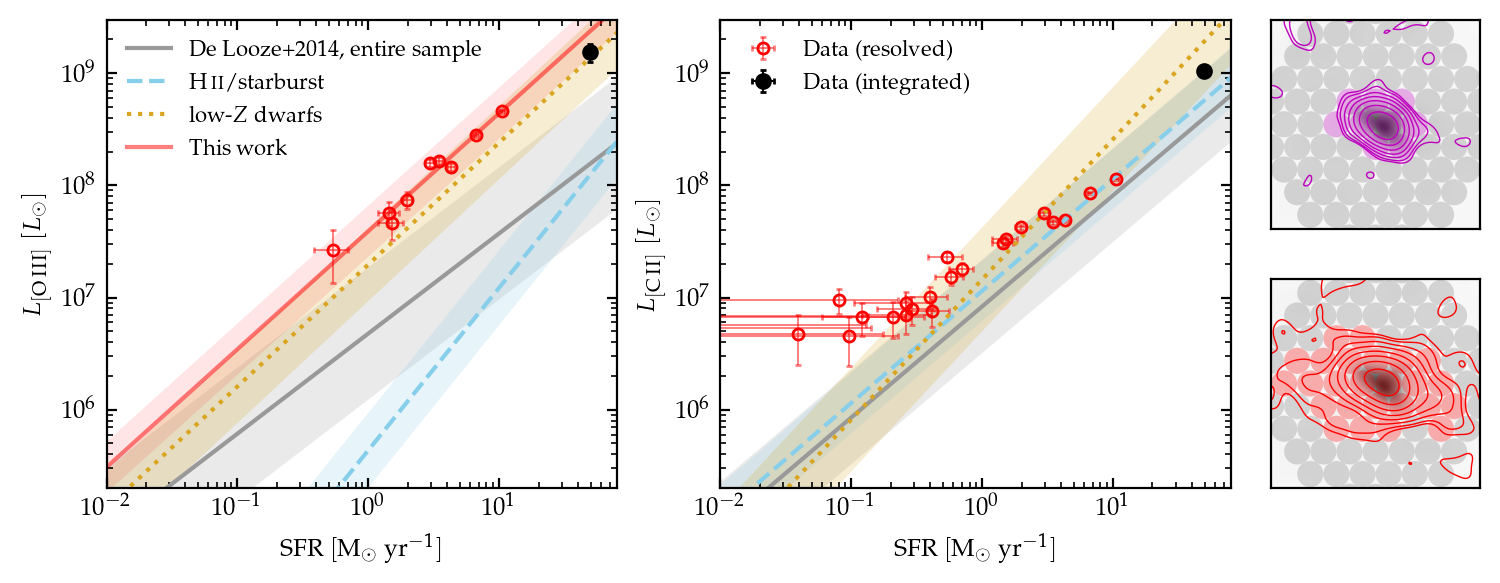

In [70]:
fig = plt.figure(figsize=(7.5,2.8), dpi=200)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=5, figure=fig)

ax0 = plt.subplot(gs[:,:2])
ax1 = plt.subplot(gs[:,2:4])
iax0 = plt.subplot(gs[0,-1])
iax1 = plt.subplot(gs[1,-1])

cond = LOIII_ap > 2*LOIII_ap_err
markers, caps, bars = ax0.errorbar(SFR_ap[cond], LOIII_ap[cond], xerr=SFR_ap_err[cond], yerr=LOIII_ap_err[cond], marker='o', elinewidth=0.7, capthick=0.7, 
                                     capsize=1, lw=0, ms=4, mew=1, mfc='none', mec='r', ecolor='r')

ax0.errorbar([SFR_int], [LOIII_int], xerr=SFR_int_err, yerr=LOIII_int_err, marker='o', elinewidth=0.7, capthick=0.7, capsize=1, lw=0, 
               ms=5, mew=1, mfc='k', mec='k', ecolor='k')

[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

x = np.log10(LOIII_ap[cond])
y = np.log10(SFR_ap[cond])
y_err = 0.434*(SFR_ap_err[cond]/SFR_ap[cond])
def line(x, m,b): 
    return m*x+b
popt, pcov = curve_fit(line, x, y, sigma=y_err, p0=[1, -6])
perr = np.sqrt(np.diag(pcov))
pdisp = np.sqrt(np.sum(np.power(y - line(x, *popt), 2)))
print(f'best-fit m = {popt[0]:.2f} ± {perr[0]:.2f}')
print(f'best-fit b = {popt[1]:.2f} ± {perr[1]:.2f}')
print(f'1sigma dispersion = {pdisp:.2f}')


cond = LCII_ap > 2*LCII_ap_err
markers, caps, bars = ax1.errorbar(SFR_ap[cond], LCII_ap[cond], xerr=SFR_ap_err[cond], yerr=LCII_ap_err[cond], marker='o', elinewidth=0.7, capthick=0.7, 
                                     capsize=1, lw=0, ms=4, mew=1, mfc='none', mec='r', ecolor='r', label='Data (resolved)')

ax1.errorbar([SFR_int], [LCII_int], xerr=SFR_int_err, yerr=LCII_int_err, marker='o', elinewidth=0.7, capthick=0.7, capsize=1, lw=0, 
               ms=5, mew=1, mfc='k', mec='k', ecolor='k', label='Data (integrated)')




[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# inverted from De Looze et al. Table 3
## entire sample
yint, slope, disp = -6.99, 1.01, 0.42
yint = -yint/slope
slope = 1/slope
x = np.array([-3,3])
ax1.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='0.6')
ax1.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='0.6', alpha=0.2, zorder=-1000)

yint, slope, disp = -7.48, 1.12, 0.66
yint = -yint/slope
slope = 1/slope
ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='0.6', label='De Looze+2014, entire sample')
ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='0.6', alpha=0.2, zorder=-1000)

## HII/starburst galaxies
yint, slope, disp = -7.06, 1, 0.27
yint = -yint/slope
slope = 1/slope
ax1.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='skyblue', linestyle='--')
ax1.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)

yint, slope, disp = -3.89, 0.69, 0.23
yint = -yint/slope
slope = 1/slope
ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='skyblue', linestyle='--', label=r'${\rm H}\,\textsc{ii}$/starburst')
ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)

## low-Z dwarfs
yint, slope, disp = -5.73, 0.8, 0.37
yint = -yint/slope
slope = 1/slope
ax1.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='goldenrod', linestyle=':')
ax1.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)

yint, slope, disp = -6.71, 0.92, 0.3
yint = -yint/slope
slope = 1/slope
ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='goldenrod', linestyle=':', label=r'low-$Z$ dwarfs')
ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)


yint, slope, disp = popt[1], popt[0], pdisp
yint = -yint/slope
slope = 1/slope
ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='r', alpha=0.5, label='This work')
ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='r', alpha=0.1, zorder=-1000)




ax1.legend(fontsize=8, loc='upper left')
ax0.legend(fontsize=8, loc='upper left')
ax1.set_ylabel(r'$L_{[{\rm C}\,\textsc{ii}]}~[L_{\odot}]$')
ax0.set_ylabel(r'$L_{[{\rm O}\,\textsc{iii}]}~[L_{\odot}]$')
ax0.set_xlabel(r'${\rm SFR}~[{\rm M}_\odot~{\rm yr}^{-1}]$')
ax1.set_xlabel(r'${\rm SFR}~[{\rm M}_\odot~{\rm yr}^{-1}]$')

ax0.loglog()
ax1.loglog()
ax0.set_xlim(1e-2,80)
ax1.set_xlim(1e-2,80)
ax0.set_ylim(2e5,3e9)
ax1.set_ylim(2e5,3e9)
ax0.tick_params(direction='in',which='both')
ax1.tick_params(direction='in',which='both')

R = 3

im = image('OIII','linemfs','natural_uv0.5')
iax0.imshow(SFR_tot, extent=im.extent, cmap='Greys', vmin=-0.01, vmax=0.12)
iax0.contour(im.data/im.std, levels=[2,3,5,8,13,21,34,55], linewidths=0.5, colors='m', extent=im.extent)
iax0.set_xlim(R,-R)
iax0.set_ylim(-R,R)
iax0.tick_params(left=False,top=False,right=False,bottom=False,labelleft=False,labelbottom=False)

for i,coord in enumerate(coords):
    x, y = coord
    if LOIII_ap[i] > 2*LOIII_ap_err[i]:
        color='m'
    else:
        color='0.5'
    iax0.add_patch(mpl.patches.Circle((x,y),radius=r, fc=color, ec='none', alpha=0.3))



im = image('CII','linemfs','natural_uv0.7')
iax1.imshow(SFR_tot, extent=im.extent, cmap='Greys', vmin=-0.01, vmax=0.12)
iax1.contour(im.data/im.std, levels=[2,3,5,8,13,21,34,55], linewidths=0.5, colors='r', extent=im.extent)
iax1.set_xlim(R,-R)
iax1.set_ylim(-R,R)
iax1.tick_params(left=False,top=False,right=False,bottom=False,labelleft=False,labelbottom=False)

for i,coord in enumerate(coords):
    x, y = coord
    if LCII_ap[i] > 2*LCII_ap_err[i]:
        color='r'
    else:
        color='0.5'
    iax1.add_patch(mpl.patches.Circle((x,y),radius=r, fc=color, ec='none', alpha=0.3))




plt.savefig('LCII_LOIII_SFR.pdf')
plt.show()

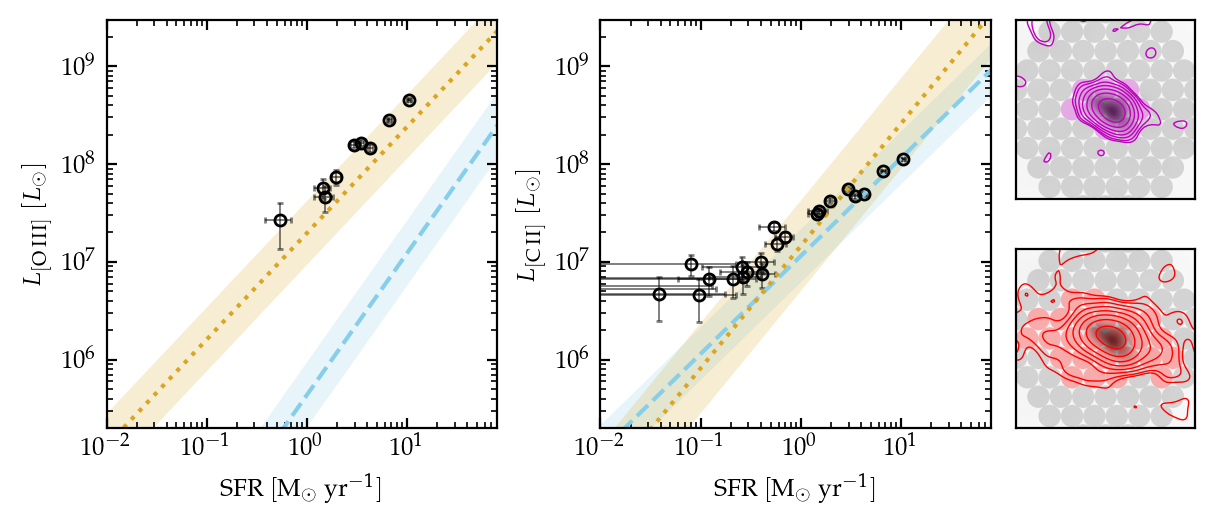

In [36]:
fig = plt.figure(figsize=(6,2.5), dpi=200)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=5, figure=fig)

ax0 = plt.subplot(gs[:,:2])
ax1 = plt.subplot(gs[:,2:4])
iax0 = plt.subplot(gs[0,-1])
iax1 = plt.subplot(gs[1,-1])

cond = LOIII_ap > 2*LOIII_ap_err
markers, caps, bars = ax0.errorbar(SFR_ap[cond], LOIII_ap[cond], xerr=SFR_ap_err[cond], yerr=LOIII_ap_err[cond], marker='o', elinewidth=0.7, capthick=0.7, 
                                     capsize=1, lw=0, ms=4, mew=1, mfc='none', mec='k', ecolor='k')


[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]


cond = LCII_ap > 2*LCII_ap_err
markers, caps, bars = ax1.errorbar(SFR_ap[cond], LCII_ap[cond], xerr=SFR_ap_err[cond], yerr=LCII_ap_err[cond], marker='o', elinewidth=0.7, capthick=0.7, 
                                     capsize=1, lw=0, ms=4, mew=1, mfc='none', mec='k', ecolor='k')


[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# inverted from De Looze et al. Table 3
# ## entire sample
# yint, slope, disp = -6.99, 1.01, 0.42
# yint = -yint/slope
# slope = 1/slope
x = np.array([-3,3])
# ax1.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='0.6')
# ax1.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='0.6', alpha=0.2, zorder=-1000)

# yint, slope, disp = -7.48, 1.12, 0.66
# yint = -yint/slope
# slope = 1/slope
# ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='0.6', label='De Looze+2014, entire sample')
# ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='0.6', alpha=0.2, zorder=-1000)

## HII/starburst galaxies
yint, slope, disp = -7.06, 1, 0.27
yint = -yint/slope
slope = 1/slope
ax1.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='skyblue', linestyle='--')
ax1.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)

yint, slope, disp = -3.89, 0.69, 0.23
yint = -yint/slope
slope = 1/slope
ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='skyblue', linestyle='--', label=r'${\rm H}\,\textsc{ii}$/starburst')
ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)

## low-Z dwarfs
yint, slope, disp = -5.73, 0.8, 0.37
yint = -yint/slope
slope = 1/slope
ax1.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='goldenrod', linestyle=':')
ax1.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)

yint, slope, disp = -6.71, 0.92, 0.3
yint = -yint/slope
slope = 1/slope
ax0.plot(np.power(10.,x),np.power(10.,slope*x+yint), color='goldenrod', linestyle=':', label=r'low-$Z$ dwarfs')
ax0.fill_between(np.power(10.,x),np.power(10.,slope*(x-disp)+yint),np.power(10.,slope*(x+disp)+yint), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)



# ax1.legend(fontsize=8, loc='upper left')
# ax0.legend(fontsize=8, loc='upper left')
ax1.set_ylabel(r'$L_{[{\rm C}\,\textsc{ii}]}~[L_{\odot}]$')
ax0.set_ylabel(r'$L_{[{\rm O}\,\textsc{iii}]}~[L_{\odot}]$')
ax0.set_xlabel(r'${\rm SFR}~[{\rm M}_\odot~{\rm yr}^{-1}]$')
ax1.set_xlabel(r'${\rm SFR}~[{\rm M}_\odot~{\rm yr}^{-1}]$')

ax0.loglog()
ax1.loglog()
ax0.set_xlim(1e-2,80)
ax1.set_xlim(1e-2,80)
ax0.set_ylim(2e5,3e9)
ax1.set_ylim(2e5,3e9)
ax0.tick_params(direction='in',which='both')
ax1.tick_params(direction='in',which='both')

R = 3

im = image('OIII','linemfs','natural_uv0.5')
iax0.imshow(SFR_tot, extent=im.extent, cmap='Greys', vmin=-0.01, vmax=0.12)
iax0.contour(im.data/im.std, levels=[2,3,5,8,13,21,34,55], linewidths=0.5, colors='m', extent=im.extent)
iax0.set_xlim(R,-R)
iax0.set_ylim(-R,R)
iax0.tick_params(left=False,top=False,right=False,bottom=False,labelleft=False,labelbottom=False)

for i,coord in enumerate(coords):
    x, y = coord
    if LOIII_ap[i] > 2*LOIII_ap_err[i]:
        color='m'
    else:
        color='0.5'
    iax0.add_patch(mpl.patches.Circle((x,y),radius=r, fc=color, ec='none', alpha=0.3))



im = image('CII','linemfs','natural_uv0.7')
iax1.imshow(SFR_tot, extent=im.extent, cmap='Greys', vmin=-0.01, vmax=0.12)
iax1.contour(im.data/im.std, levels=[2,3,5,8,13,21,34,55], linewidths=0.5, colors='r', extent=im.extent)
iax1.set_xlim(R,-R)
iax1.set_ylim(-R,R)
iax1.tick_params(left=False,top=False,right=False,bottom=False,labelleft=False,labelbottom=False)

for i,coord in enumerate(coords):
    x, y = coord
    if LCII_ap[i] > 2*LCII_ap_err[i]:
        color='r'
    else:
        color='0.5'
    iax1.add_patch(mpl.patches.Circle((x,y),radius=r, fc=color, ec='none', alpha=0.3))




plt.savefig('LCII_LOIII_SFR_present.pdf')
plt.show()

# Circular Annuli

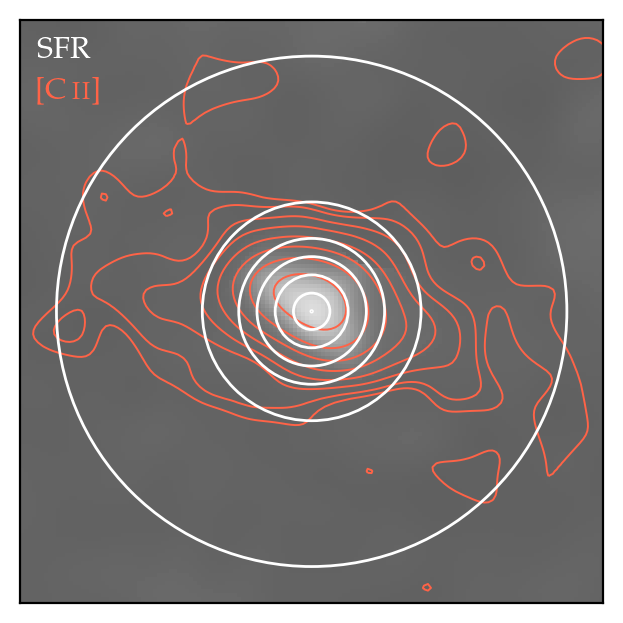

In [57]:
plt.figure(figsize=(3,3))

plt.imshow(SFR_tot, extent=im.extent, vmin=-0.07, vmax=0.15, cmap='Greys_r')

im = image('CII','linemfs','natural_uv0.7')
plt.contour(im.data, extent=im.extent, levels=np.array([2,3,5,8,13,21,34,55])*im.std, colors='tomato', linewidths=0.7)


bins = np.arange(0.001, 3, 0.2)**1.6


Rs = np.array([0.01, 0.25, 0.5, 0.75, 1, 1.5, 3.5])


x0, y0 = -0.2, -0.1
circles = np.array([(x0,y0,r) for r in Rs])

for i,circle in enumerate(circles):
    x, y, r = circle
    plt.gca().add_patch(mpl.patches.Circle((x,y),radius=r, fc='none', ec='w', zorder=1000))
    
    
plt.xlim(3.8,-4.2)
plt.ylim(-4.1,3.9)
plt.tick_params(labelleft=False,labelbottom=False,top=False,right=False,bottom=False,left=False)

plt.annotate('SFR', (0.03,0.97), va='top', ha='left', xycoords='axes fraction', color='w', fontsize=11)
plt.annotate(r'[$\rm {C}\,\textsc{ii}$]', (0.03,0.9), va='top', ha='left', xycoords='axes fraction', color='tomato', fontsize=11)

plt.savefig('annuli.pdf')
plt.show()

In [58]:
x0 = -x0/im.cell + im.x0
y0 = y0/im.cell + im.y0
Rs = Rs/im.cell

aperture = [CircularAnnulus([x0,y0], r_in=r_in, r_out=r_out) for r_in,r_out in zip(Rs[:-1],Rs[1:])]
# aperture = [CircularAperture([x0,y0], r) for r in Rs]
LCII_ap = aperture_photometry(LCII_tot, aperture, error=LCII_std)
LCII_ap_uncor = aperture_photometry(LCII_tot_uncor, aperture, error=LCII_std_uncor)

LOIII_ap = aperture_photometry(LOIII_tot, aperture, error=LOIII_std)
LOIII_ap_uncor = aperture_photometry(LOIII_tot_uncor, aperture, error=LOIII_std_uncor)

SFR_IR_ap = aperture_photometry(SFR_IR, aperture, error=SFR_IR_err)
SFR_UV_ap = aperture_photometry(SFR_UV, aperture, error=SFR_UV_err)
SFR_IR_ap_uncor = aperture_photometry(SFR_IR_uncor, aperture, error=SFR_IR_uncor_err)
SFR_UV_ap_uncor = aperture_photometry(SFR_UV_uncor, aperture, error=SFR_UV_uncor_err)

L_IR_ap = aperture_photometry(L_IR, aperture, error=L_IR_err)
L_IR_ap_uncor = aperture_photometry(L_IR_uncor, aperture, error=L_IR_uncor_err)

In [59]:
# dists = Rs * im.cell
dists = 0.5*(Rs[1:]+Rs[:-1]) * im.cell

In [60]:
area = np.array([a.area for a in aperture]) * (0.055)**2 * (5.28**2)

LCII_ap_err = np.array([LCII_ap[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
LCII_ap = np.array([LCII_ap[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

LCII_ap_uncor_err = np.array([LCII_ap_uncor[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
LCII_ap_uncor = np.array([LCII_ap_uncor[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

Sigma_LCII_ap_err = LCII_ap_uncor_err / area
Sigma_LCII_ap = LCII_ap_uncor / area

LOIII_ap_err = np.array([LOIII_ap[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
LOIII_ap = np.array([LOIII_ap[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

LOIII_ap_uncor_err = np.array([LOIII_ap_uncor[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
LOIII_ap_uncor = np.array([LOIII_ap_uncor[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

L_IR_ap_err = np.array([L_IR_ap[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
L_IR_ap = np.array([L_IR_ap[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

L_IR_ap_uncor_err = np.array([L_IR_ap_uncor[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
L_IR_ap_uncor = np.array([L_IR_ap_uncor[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

Sigma_IR_ap_err = L_IR_ap_uncor_err / area
Sigma_IR_ap = L_IR_ap_uncor / area

SFR_UV_ap_err = np.array([SFR_UV_ap[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
SFR_UV_ap = np.array([SFR_UV_ap[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

SFR_IR_ap_err = np.array([SFR_IR_ap[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
SFR_IR_ap = np.array([SFR_IR_ap[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

SFR_ap = SFR_UV_ap + SFR_IR_ap
SFR_ap_err = np.sqrt(SFR_IR_ap_err**2 + SFR_UV_ap_err**2)

SFR_UV_ap_uncor_err = np.array([SFR_UV_ap_uncor[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
SFR_UV_ap_uncor = np.array([SFR_UV_ap_uncor[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

SFR_IR_ap_uncor_err = np.array([SFR_IR_ap_uncor[f'aperture_sum_err_{i}'] for i in range(len(dists))]).T[0]
SFR_IR_ap_uncor = np.array([SFR_IR_ap_uncor[f'aperture_sum_{i}'] for i in range(len(dists))]).T[0]

SFR_ap_uncor = SFR_UV_ap_uncor + SFR_IR_ap_uncor
SFR_ap_uncor_err = np.sqrt(SFR_IR_ap_uncor_err**2 + SFR_UV_ap_uncor_err**2)

Sigma_LOIII_ap_err = LOIII_ap_uncor_err / area
Sigma_LOIII_ap = LOIII_ap_uncor / area

Sigma_SFR_ap_err = SFR_ap_uncor_err / area
Sigma_SFR_ap = SFR_ap_uncor / area


Sigma_SFR_UV_ap_err = SFR_UV_ap_uncor_err / area
Sigma_SFR_UV_ap = SFR_UV_ap_uncor / area
Sigma_SFR_IR_ap_err = SFR_IR_ap_uncor_err / area
Sigma_SFR_IR_ap = SFR_IR_ap_uncor / area

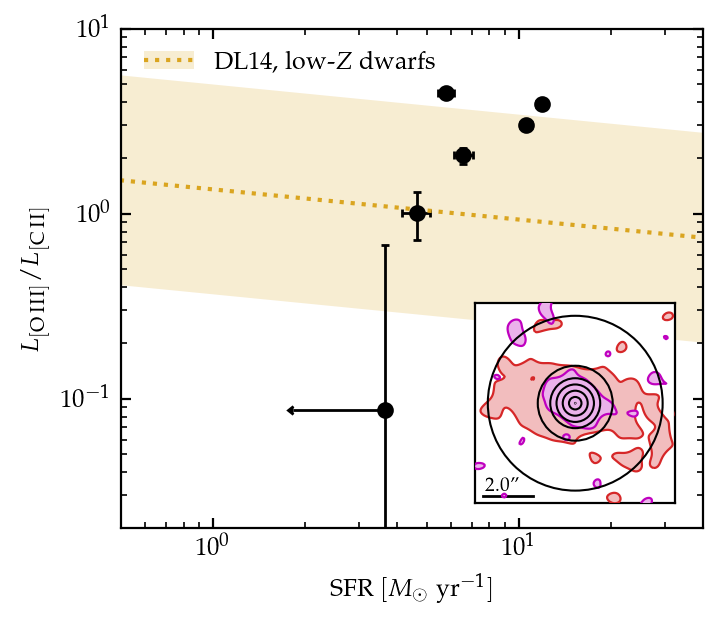

In [520]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))

y = LOIII_ap/LCII_ap
yerr = y * np.sqrt((LOIII_ap_err/LOIII_ap)**2 + (LCII_ap_err/LCII_ap)**2)

cond1 = (LOIII_ap > 0) & (Sigma_SFR_ap > 0)
markers, caps, bars = ax.errorbar(SFR_ap[cond1], y[cond1], xerr=SFR_ap_err[cond1], yerr=yerr[cond1], marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', label=r'Data (detections)')


cond1 = (LOIII_ap > 0) & (Sigma_SFR_ap < 0)
markers, caps, bars = ax.errorbar(3*SFR_ap_err[cond1], y[cond1], xerr=1.5*SFR_ap_err[cond1], yerr=yerr[cond1], marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', xuplims=True)


cond1 = (LOIII_ap < 0) & (Sigma_SFR_ap > 0)
y = 3*LOIII_ap_err/LCII_ap
yerr = 0.5*y
markers, caps, bars = ax.errorbar(SFR_ap[cond1], y[cond1], xerr=SFR_ap_err[cond1], yerr=yerr[cond1], marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', uplims=True)


xrange = np.arange(-4,4,0.2)

## OIII
yint, slope, disp = -6.71, 0.92, 0.3 # low-Z dwarfs (global)
# yint, slope, disp = -7.33, 1.01, 0.21 # (resolved)

yint = -yint/slope
slope = 1/slope

log_oiii_exp = slope*xrange+yint

diff_rand = np.zeros((1000,len(xrange)))
for i in range(1000):
    xrange_rand = np.random.normal(loc=xrange, scale=disp)
    diff_rand[i,:] = slope*xrange_rand+yint - log_oiii_exp
log_oiii_exp_disp = np.median(np.std(diff_rand, axis=0))

## CII
yint, slope, disp = -5.73, 0.8, 0.37 # low-Z dwarfs (global)
# yint, slope, disp = -6.99, 0.93, 0.32 # (resolved)

yint = -yint/slope
slope = 1/slope

log_cii_exp = slope*xrange+yint

diff_rand = np.zeros((1000,len(xrange)))
for i in range(1000):
    xrange_rand = np.random.normal(loc=xrange, scale=disp)
    diff_rand[i,:] = slope*xrange_rand+yint - log_cii_exp
log_cii_exp_disp = np.median(np.std(diff_rand, axis=0))


ax.set_ylabel(r'$L_{[{\rm O}\,\textsc{iii}]}/L_{[{\rm C}\,\textsc{ii}]}$')
ax.set_xlabel(r'${\rm SFR}~[M_{\odot}~{\rm yr}^{-1}]$')

ax.loglog()
ax.set_xlim(5e-1,4e1)
ax.set_ylim(2e-2,10)
ax.tick_params(direction='in',which='both')

y = log_oiii_exp-log_cii_exp
yerr = np.sqrt(log_oiii_exp_disp**2 + log_cii_exp_disp**2)

dl1, = ax.plot(np.power(10., xrange), np.power(10., y), color='goldenrod', linestyle=':')
dl2 = ax.fill_between(np.power(10., xrange), np.power(10., y-yerr), np.power(10., y+yerr), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)
ax.legend([(dl1,dl2)],['DL14, low-$Z$ dwarfs'], loc='upper left')
# ax.set_aspect('equal')


iax = ax.inset_axes([0.58,0.05,0.4,0.4])
im = image('CII','linemfs','natural_uv0.7', correct_mu=False)
# ax.imshow(im.data/im.std_map, extent=im.extent, vmin=-3, vmax=3, cmap='Greys_r')
# plt.contour(im.data/im.std_map, extent=im.extent, levels=np.array([2,3,5,8,13,21,34,55]), colors='tab:red', linewidths=0.7)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='w', alpha=1, zorder=50)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='tab:red', alpha=0.3, zorder=51)
iax.contour(im.data/im.std_map, extent=im.extent, levels=[2], colors='tab:red', linewidths=0.8, zorder=52)

im = image('OIII','linemfs','natural_uv0.5', correct_mu=False)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='w', alpha=1, zorder=100)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='m', alpha=0.3, zorder=101)
iax.contour(im.data/im.std_map, extent=im.extent, levels=[2], colors='m', linewidths=0.8, zorder=102)

for i,circle in enumerate(circles):
    x, y, r = circle
    iax.add_patch(mpl.patches.Circle((x,y),radius=r, fc='none', ec='k', zorder=1000, linewidth=0.75))

iax.set_xlim(3.8,-4.2)
iax.set_ylim(-4.1,3.9)
iax.tick_params(labelleft=False,labelbottom=False,top=False,right=False,bottom=False,left=False)

iax.plot([3.5, 1.5], [-3.8]*2, color='k', linewidth=1)
iax.annotate("2.0''", (3.4, -3.6), color='k', ha='left', fontsize=7)
iax.set_aspect('equal')

# plt.savefig('plots/ratio_SigSFR.pdf')
plt.show()

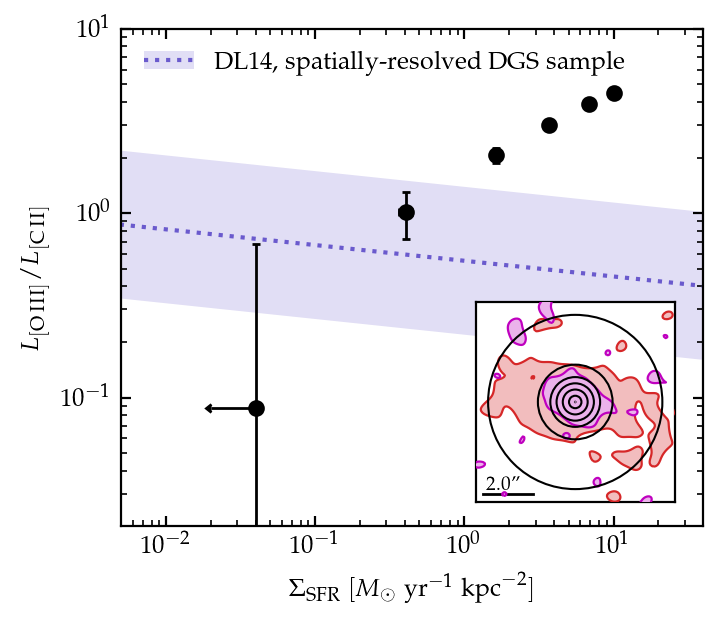

In [43]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))

y = LOIII_ap/LCII_ap
yerr = y * np.sqrt((LOIII_ap_err/LOIII_ap)**2 + (LCII_ap_err/LCII_ap)**2)

cond1 = (LOIII_ap > 0) & (Sigma_SFR_ap > 0)
markers, caps, bars = ax.errorbar(Sigma_SFR_ap[cond1], y[cond1], xerr=Sigma_SFR_ap_err[cond1], yerr=yerr[cond1], marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', label=r'Data (detections)')


cond1 = (LOIII_ap > 0) & (Sigma_SFR_ap < 0)
markers, caps, bars = ax.errorbar(3*Sigma_SFR_ap_err[cond1], y[cond1], xerr=1.5*Sigma_SFR_ap_err[cond1], yerr=yerr[cond1], marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', xuplims=True)


cond1 = (LOIII_ap < 0) & (Sigma_SFR_ap > 0)
y = 3*LOIII_ap_err/LCII_ap
yerr = 0.5*y
markers, caps, bars = ax.errorbar(Sigma_SFR_ap[cond1], y[cond1], xerr=Sigma_SFR_ap_err[cond1], yerr=yerr[cond1], marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', uplims=True)


xrange = np.arange(-4,4,0.2)

## OIII
# yint, slope, disp = -6.71, 0.92, 0.3 # low-Z dwarfs (global)
yint, slope, disp = -7.33, 1.01, 0.21 # (resolved)

yint = -yint/slope
slope = 1/slope

log_oiii_exp = slope*xrange+yint

diff_rand = np.zeros((1000,len(xrange)))
for i in range(1000):
    xrange_rand = np.random.normal(loc=xrange, scale=disp)
    diff_rand[i,:] = slope*xrange_rand+yint - log_oiii_exp
log_oiii_exp_disp = np.median(np.std(diff_rand, axis=0))

## CII
# yint, slope, disp = -5.73, 0.8, 0.37 # low-Z dwarfs (global)
yint, slope, disp = -6.99, 0.93, 0.32 # (resolved)

yint = -yint/slope
slope = 1/slope

log_cii_exp = slope*xrange+yint

diff_rand = np.zeros((1000,len(xrange)))
for i in range(1000):
    xrange_rand = np.random.normal(loc=xrange, scale=disp)
    diff_rand[i,:] = slope*xrange_rand+yint - log_cii_exp
log_cii_exp_disp = np.median(np.std(diff_rand, axis=0))


ax.set_ylabel(r'$L_{[{\rm O}\,\textsc{iii}]}/L_{[{\rm C}\,\textsc{ii}]}$')
ax.set_xlabel(r'$\Sigma_{\rm SFR}~[M_{\odot}~{\rm yr}^{-1}~{\rm kpc}^{-2}]$')

ax.loglog()
ax.set_xlim(5e-3,4e1)
ax.set_ylim(2e-2,10)
ax.tick_params(direction='in',which='both')

y = log_oiii_exp-log_cii_exp
yerr = np.sqrt(log_oiii_exp_disp**2 + log_cii_exp_disp**2)

dl1, = ax.plot(np.power(10., xrange), np.power(10., y), color='slateblue', linestyle=':')
dl2 = ax.fill_between(np.power(10., xrange), np.power(10., y-yerr), np.power(10., y+yerr), ec='none', fc='slateblue', alpha=0.2, zorder=-1000)
ax.legend([(dl1,dl2)],['DL14, spatially-resolved DGS sample'], loc='upper left')
# ax.set_aspect('equal')


iax = ax.inset_axes([0.58,0.05,0.4,0.4])
im = image('CII','linemfs','natural_uv0.7', correct_mu=False)
# ax.imshow(im.data/im.std_map, extent=im.extent, vmin=-3, vmax=3, cmap='Greys_r')
# plt.contour(im.data/im.std_map, extent=im.extent, levels=np.array([2,3,5,8,13,21,34,55]), colors='tab:red', linewidths=0.7)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='w', alpha=1, zorder=50)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='tab:red', alpha=0.3, zorder=51)
iax.contour(im.data/im.std_map, extent=im.extent, levels=[2], colors='tab:red', linewidths=0.8, zorder=52)

im = image('OIII','linemfs','natural_uv0.5', correct_mu=False)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='w', alpha=1, zorder=100)
iax.contourf(im.data/im.std_map, extent=im.extent, levels=[2,55], colors='m', alpha=0.3, zorder=101)
iax.contour(im.data/im.std_map, extent=im.extent, levels=[2], colors='m', linewidths=0.8, zorder=102)

for i,circle in enumerate(circles):
    x, y, r = circle
    iax.add_patch(mpl.patches.Circle((x,y),radius=r, fc='none', ec='k', zorder=1000, linewidth=0.75))

iax.set_xlim(3.8,-4.2)
iax.set_ylim(-4.1,3.9)
iax.tick_params(labelleft=False,labelbottom=False,top=False,right=False,bottom=False,left=False)

iax.plot([3.5, 1.5], [-3.8]*2, color='k', linewidth=1)
iax.annotate("2.0''", (3.4, -3.6), color='k', ha='left', fontsize=7)
iax.set_aspect('equal')

plt.savefig('plots/ratio_SigSFR.pdf')
plt.show()

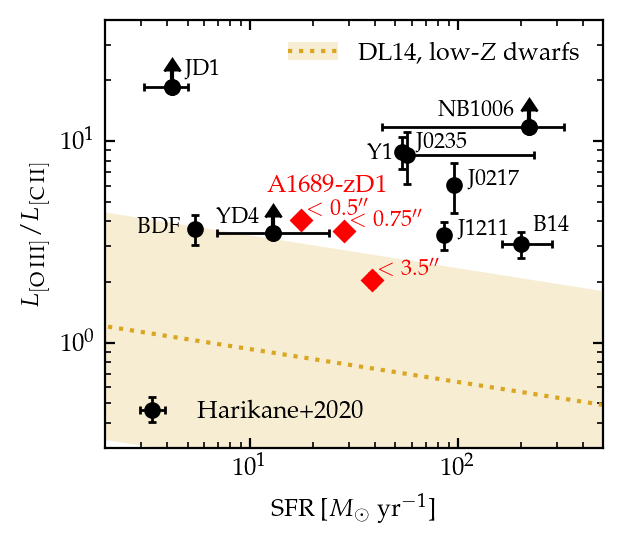

In [70]:
fig, ax = plt.subplots(1,1, figsize=(3, 2.6))

import pandas as pd
h2020 = pd.read_csv('Harikane2020.csv')

x = h2020.SFR
y = h2020.LOIII/h2020.LCII
xerr = np.array([h2020.sig_SFR_low,h2020.sig_SFR_up])
yerr = y*np.sqrt((h2020.sig_LOIII/h2020.LOIII)**2 + (h2020.sig_LCII/h2020.LCII)**2)

ax.errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', label='Harikane+2020')
leg1 = ax.legend(loc='lower left')

h2020_1 = h2020[h2020.LCII==0]
x = h2020_1.SFR
y = h2020_1.LOIII/(3*h2020_1.sig_LCII)
xerr = np.array([h2020_1.sig_SFR_low,h2020_1.sig_SFR_up])
yerr = y*0.2

ax.errorbar(x, y, xerr=xerr, yerr=0, marker='o', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k')
ax.errorbar(x, y, xerr=0, yerr=yerr, marker='o', elinewidth=1.5, capthick=2, capsize=3, 
            lw=0, ms=5, mew=1, mfc='k', mec='k', ecolor='k', lolims=True)

xrange = np.arange(-4,4,0.2)
### PLOT DE LOOZE+14 RELATION FOR LOW-Z DWARFS
## OIII
yint, slope, disp = -6.71, 0.92, 0.3 # low-Z dwarfs (global)
yint = -yint/slope
slope = 1/slope
log_oiii_exp = slope*xrange+yint
diff_rand = np.zeros((1000,len(xrange)))
for i in range(1000):
    xrange_rand = np.random.normal(loc=xrange, scale=disp)
    diff_rand[i,:] = slope*xrange_rand+yint - log_oiii_exp
log_oiii_exp_disp = np.median(np.std(diff_rand, axis=0))

## CII
yint, slope, disp = -5.73, 0.8, 0.37 # low-Z dwarfs (global)
yint = -yint/slope
slope = 1/slope
log_cii_exp = slope*xrange+yint
diff_rand = np.zeros((1000,len(xrange)))
for i in range(1000):
    xrange_rand = np.random.normal(loc=xrange, scale=disp)
    diff_rand[i,:] = slope*xrange_rand+yint - log_cii_exp
log_cii_exp_disp = np.median(np.std(diff_rand, axis=0))
    
y = log_oiii_exp-log_cii_exp
yerr = np.sqrt(log_oiii_exp_disp**2 + log_cii_exp_disp**2)

dl1, = ax.plot(np.power(10., xrange), np.power(10., y), color='goldenrod', linestyle=':')
dl2 = ax.fill_between(np.power(10., xrange), np.power(10., y-yerr), np.power(10., y+yerr), ec='none', fc='goldenrod', alpha=0.2, zorder=-1000)


# ### PLOT DE LOOZE+14 RELATION FOR HII/starburst
# ## OIII
# yint, slope, disp = -3.89, 0.69, 0.23 
# yint = -yint/slope
# slope = 1/slope
# log_oiii_exp = slope*xrange+yint
# diff_rand = np.zeros((1000,len(xrange)))
# for i in range(1000):
#     xrange_rand = np.random.normal(loc=xrange, scale=disp)
#     diff_rand[i,:] = slope*xrange_rand+yint - log_oiii_exp
# log_oiii_exp_disp = np.median(np.std(diff_rand, axis=0))

# ## CII
# yint, slope, disp = -7.06, 1.0, 0.27 
# yint = -yint/slope
# slope = 1/slope
# log_cii_exp = slope*xrange+yint
# diff_rand = np.zeros((1000,len(xrange)))
# for i in range(1000):
#     xrange_rand = np.random.normal(loc=xrange, scale=disp)
#     diff_rand[i,:] = slope*xrange_rand+yint - log_cii_exp
# log_cii_exp_disp = np.median(np.std(diff_rand, axis=0))
    
# y = log_oiii_exp-log_cii_exp
# yerr = np.sqrt(log_oiii_exp_disp**2 + log_cii_exp_disp**2)

# dl3, = ax.plot(np.power(10., xrange), np.power(10., y), color='skyblue', linestyle=':')
# dl4 = ax.fill_between(np.power(10., xrange), np.power(10., y-yerr), np.power(10., y+yerr), ec='none', fc='skyblue', alpha=0.2, zorder=-1000)


# leg2 = ax.legend([(dl1,dl2),(dl3,dl4)],['DL14, low-$Z$ dwarfs','DL14, HII/starburst'], loc='upper right')
leg2 = ax.legend([(dl1,dl2)],['DL14, low-$Z$ dwarfs'], loc='upper right')
ax.add_artist(leg1)

x = np.sum(SFR_ap)
xerr = np.sqrt(np.sum(SFR_ap_err**2))
y = np.sum(LOIII_ap)/np.sum(LCII_ap)
yerr = y * np.sqrt((np.sqrt(np.sum(LOIII_ap_err**2))/np.sum(LOIII_ap))**2+(np.sqrt(np.sum(LCII_ap_err**2))/np.sum(LCII_ap))**2)
ax.errorbar(x, y, xerr=xerr, yerr=yerr, marker='D', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='r', mec='r', ecolor='r')

ax.annotate("A1689-zD1 \n", (12, 4), color='r')
ax.annotate(r"$< 3.5''$", (x*1.07, y*1.05), color='r', fontsize=8)


x = np.sum(SFR_ap[:3])
xerr = np.sqrt(np.sum(SFR_ap_err[:3]**2))
y = np.sum(LOIII_ap[:3])/np.sum(LCII_ap[:3])
yerr = y * np.sqrt((np.sqrt(np.sum(LOIII_ap_err[:3]**2))/np.sum(LOIII_ap[:3]))**2+(np.sqrt(np.sum(LCII_ap_err[:3]**2))/np.sum(LCII_ap[:3]))**2)
ax.errorbar(x, y, xerr=xerr, yerr=yerr, marker='D', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='r', mec='r', ecolor='r')

ax.annotate(r"$< 0.75''$", (x*1.07, y*1.05), color='r', fontsize=8)

x = np.sum(SFR_ap[:2])
xerr = np.sqrt(np.sum(SFR_ap_err[:2]**2))
y = np.sum(LOIII_ap[:2])/np.sum(LCII_ap[:2])
yerr = y * np.sqrt((np.sqrt(np.sum(LOIII_ap_err[:2]**2))/np.sum(LOIII_ap[:2]))**2+(np.sqrt(np.sum(LCII_ap_err[:2]**2))/np.sum(LCII_ap[:2]))**2)
ax.errorbar(x, y, xerr=xerr, yerr=yerr, marker='D', elinewidth=1, capthick=1, capsize=1.3, 
            lw=0, ms=5, mew=1, mfc='r', mec='r', ecolor='r')


ax.annotate(r"$< 0.5''$", (x*1.07, y*1.05), color='r', fontsize=8)



ax.set_xlim(2, 500)
ax.set_ylim(0.3, 40)
ax.set_xlabel(r'SFR [$M_\odot~{\rm yr}^{-1}$]')
ax.set_ylabel(r'$L_{[\rm {O}\,{\textsc{iii}}]}/L_{[\rm {C}\,{\textsc{ii}}]}$')
ax.tick_params(direction='in', which='both')
ax.loglog()

ax.annotate(h2020.iloc[0].Nickname, (h2020.iloc[0].SFR*1.15, h2020.iloc[0].LOIII/(3*h2020.iloc[0].sig_LCII)*1.15), fontsize=8)
ax.annotate(h2020.iloc[1].Nickname, (h2020.iloc[1].SFR*0.85, h2020.iloc[1].LOIII/(3*h2020.iloc[1].sig_LCII)*1.12), ha='right', fontsize=8)
ax.annotate(h2020.iloc[2].Nickname, (h2020.iloc[2].SFR*0.85, h2020.iloc[2].LOIII/(h2020.iloc[2].LCII)*1.0), ha='right', va='center', fontsize=8)
ax.annotate(h2020.iloc[3].Nickname, (h2020.iloc[3].SFR*0.85, h2020.iloc[3].LOIII/(3*h2020.iloc[3].sig_LCII)*1.12), ha='right', fontsize=8)
ax.annotate(h2020.iloc[4].Nickname, (h2020.iloc[4].SFR*1.15, h2020.iloc[4].LOIII/(h2020.iloc[4].LCII)*1.15), fontsize=8)
ax.annotate(h2020.iloc[5].Nickname, (h2020.iloc[5].SFR*0.85, h2020.iloc[5].LOIII/(h2020.iloc[5].LCII)), ha='right', va='center', fontsize=8)
ax.annotate(h2020.iloc[6].Nickname, (h2020.iloc[6].SFR*1.15, h2020.iloc[6].LOIII/(h2020.iloc[6].LCII)*1.0), fontsize=8)
ax.annotate(h2020.iloc[7].Nickname, (h2020.iloc[7].SFR*1.15, h2020.iloc[7].LOIII/(h2020.iloc[7].LCII)*1.05), fontsize=8)
ax.annotate(h2020.iloc[8].Nickname, (h2020.iloc[8].SFR*1.15, h2020.iloc[8].LOIII/(h2020.iloc[8].LCII)*1.0), fontsize=8)


plt.savefig('LOIII_LCII_halo.pdf')
plt.show()

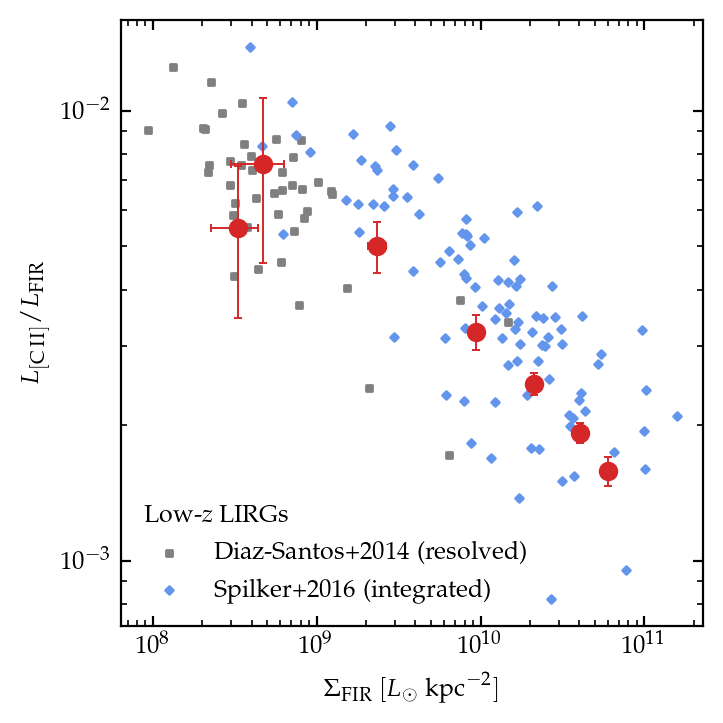

In [188]:
fig, ax = plt.subplots(figsize=(3.5,3.5))

err = LCII_ap/L_IR_ap * np.sqrt((LCII_ap_err/LCII_ap)**2 + (L_IR_ap_err/L_IR_ap)**2)

ax.errorbar(Sigma_IR_ap, LCII_ap/L_IR_ap, xerr=Sigma_IR_ap_err, yerr=err, 
            linewidth=0, capthick=0.7, capsize=1.5, elinewidth=0.7, 
            marker='o', ms=6, color='tab:red')

dz = np.loadtxt('diaz-santos2014_fig3a.txt')
x = dz[:,0]
y = dz[:,1]
ax.scatter(x,y, marker='s', s=5, color='0.5', label='Diaz-Santos+2014 (resolved)')

import pandas as pd
sp = pd.read_csv('Spilker2016.csv')
sp = sp[sp['      Sample'] == 'goals']
x = sp['SigFIR']
y = sp['LCII']/sp['LFIR']
ax.scatter(x,y,marker='D',s=4, color='cornflowerblue', label='Spilker+2016 (integrated)')


leg = ax.legend(title=r'Low-$z$ LIRGs', loc=3)
leg._legend_box.align = 'left'
ax.loglog()
# ax.set_ylim(1e6, 3e8)
# ax.set_xlim(1e-3, 1.2e1)
ax.set_xlabel(r'$\Sigma_{\rm FIR}~[L_\odot~{\rm kpc}^{-2}]$')
ax.set_ylabel(r'$L_{[{\rm C}\,\textsc{ii}]}/L_{\rm FIR}$')
ax.tick_params(direction='in', which='both')

# plt.savefig('plots/LCII_LFIR_ratio.pdf')
plt.show()
